# SUP I
## Suplementos Alimentares
### Case de Marketing e Análise de Dados
- Nomes


In [1077]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from numpy import arange 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

import os 
import math
from collections import Counter
from itertools import chain
import math

Carregando a base de dados em um dataframe usando a biblioteca pandas:

Exclusão da primeira linha, com as perguntas escritas, manualmente.


In [265]:
df = pd.read_excel('Base - Pesquisa de Mercado.xlsx', sheet_name=0)
print(df.head())

   Qfreq   P2  P3   P4   P5   P6   P7   P8   P9 P12  ...  P24  P25  P26  Qesc  \
0      4  NaN NaN  7.0  2.0  7.0  7.0  1.0  1.0   1  ...  3.0  7.0  7.0     3   
1      4  NaN NaN  5.0  1.0  1.0  3.0  5.0  4.0   1  ...  6.0  6.0  4.0     5   
2      2  NaN NaN  6.0  1.0  6.0  3.0  6.0  1.0   1  ...  7.0  7.0  7.0     4   
3      1  NaN NaN  2.0  1.0  2.0  2.0  2.0  1.0   2  ...  NaN  NaN  NaN     3   
4      1  NaN NaN  7.0  7.0  7.0  2.0  7.0  7.0   1  ...  7.0  7.0  7.0     4   

   Qciv  Qocup  Qgen  Qid  Qreg  Qclasse  
0     2    3.0   1.0   31     3        5  
1     1    3.0   1.0   59     4        3  
2     1    2.0   1.0   20     2        3  
3     2    2.0   1.0   24     1        5  
4     1    3.0   1.0   40     4        5  

[5 rows x 31 columns]


In [266]:
df.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,702.000000,363.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,702.000000,702.000000,400.000000,698.000000,702.000000,702.000000,702.00000
mean,3.528490,4.088154,4.982301,3.053097,3.669617,4.681416,4.268437,3.663717,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.703704,1.474359,2.922500,1.505731,21.039886,2.190883,2.64245
std,1.707135,2.043166,2.099517,2.316039,2.356533,1.995255,2.503590,2.558004,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.071196,0.754481,1.261138,0.500326,18.963396,1.437436,1.42289
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.00000
50%,5.000000,4.000000,6.000000,2.000000,4.000000,5.000000,5.000000,3.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,3.000000,2.000000,20.000000,1.000000,3.00000
75%,5.000000,6.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,35.000000,4.000000,4.00000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000,100.000000,5.000000,5.00000


In [267]:
df.Qfreq.value_counts(normalize=True)

5    0.517094
1    0.235043
2    0.108262
4    0.072650
3    0.066952
Name: Qfreq, dtype: float64

In [268]:
df.dtypes

Qfreq        int64
P2          object
P3         float64
P4         float64
P5         float64
P6         float64
P7         float64
P8         float64
P9         float64
P12         object
P13         object
P14         object
P15        float64
P16        float64
P17        float64
P18        float64
P19        float64
P20        float64
P21        float64
P22        float64
P23        float64
P24        float64
P25        float64
P26        float64
Qesc         int64
Qciv         int64
Qocup      float64
Qgen       float64
Qid          int64
Qreg         int64
Qclasse      int64
dtype: object

In [269]:
df.Qfreq = df['Qfreq'].astype('float')
df.Qid = df['Qid'].astype('float')


In [270]:
df.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,702.000000,363.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,702.000000,702.000000,400.000000,698.000000,702.000000,702.000000,702.00000
mean,3.528490,4.088154,4.982301,3.053097,3.669617,4.681416,4.268437,3.663717,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.703704,1.474359,2.922500,1.505731,21.039886,2.190883,2.64245
std,1.707135,2.043166,2.099517,2.316039,2.356533,1.995255,2.503590,2.558004,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.071196,0.754481,1.261138,0.500326,18.963396,1.437436,1.42289
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.00000
50%,5.000000,4.000000,6.000000,2.000000,4.000000,5.000000,5.000000,3.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,3.000000,2.000000,20.000000,1.000000,3.00000
75%,5.000000,6.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,35.000000,4.000000,4.00000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000,100.000000,5.000000,5.00000


In [271]:
i=0
while i < len(df.Qid):
    if df.Qid[i] > 6:
        if df.Qid[i] < 18:
            df.Qid[i] = 1
        elif df.Qid[i] < 25:
            df.Qid[i] = 2
        elif df.Qid[i] < 35:
            df.Qid[i] = 3
        elif df.Qid[i] < 45:
            df.Qid[i] = 4
        elif df.Qid[i] < 55:
            df.Qid[i] = 5
        else:
            df.Qid[i] = 6
    i+=1

C:\Users\Enzo\AppData\Local\Temp\ipykernel_19056\2702381451.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 3
C:\Users\Enzo\AppData\Local\Temp\ipykernel_19056\2702381451.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 6
C:\Users\Enzo\AppData\Local\Temp\ipykernel_19056\2702381451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 2
C:\Users\Enzo\AppData\Local\Temp\ipykernel_19056\2702381451.

In [272]:
df.head()

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
0,4.0,NaN,NaN,7.0,2.0,7.0,7.0,1.0,1.0,1,...,3.0,7.0,7.0,3,2,3.0,1.0,3.0,3,5
1,4.0,NaN,NaN,5.0,1.0,1.0,3.0,5.0,4.0,1,...,6.0,6.0,4.0,5,1,3.0,1.0,6.0,4,3
2,2.0,NaN,NaN,6.0,1.0,6.0,3.0,6.0,1.0,1,...,7.0,7.0,7.0,4,1,2.0,1.0,2.0,2,3
3,1.0,NaN,NaN,2.0,1.0,2.0,2.0,2.0,1.0,2,...,NaN,NaN,NaN,3,2,2.0,1.0,2.0,1,5
4,1.0,NaN,NaN,7.0,7.0,7.0,2.0,7.0,7.0,1,...,7.0,7.0,7.0,4,1,3.0,1.0,4.0,4,5


Text(0.5, 0, 'Classe')

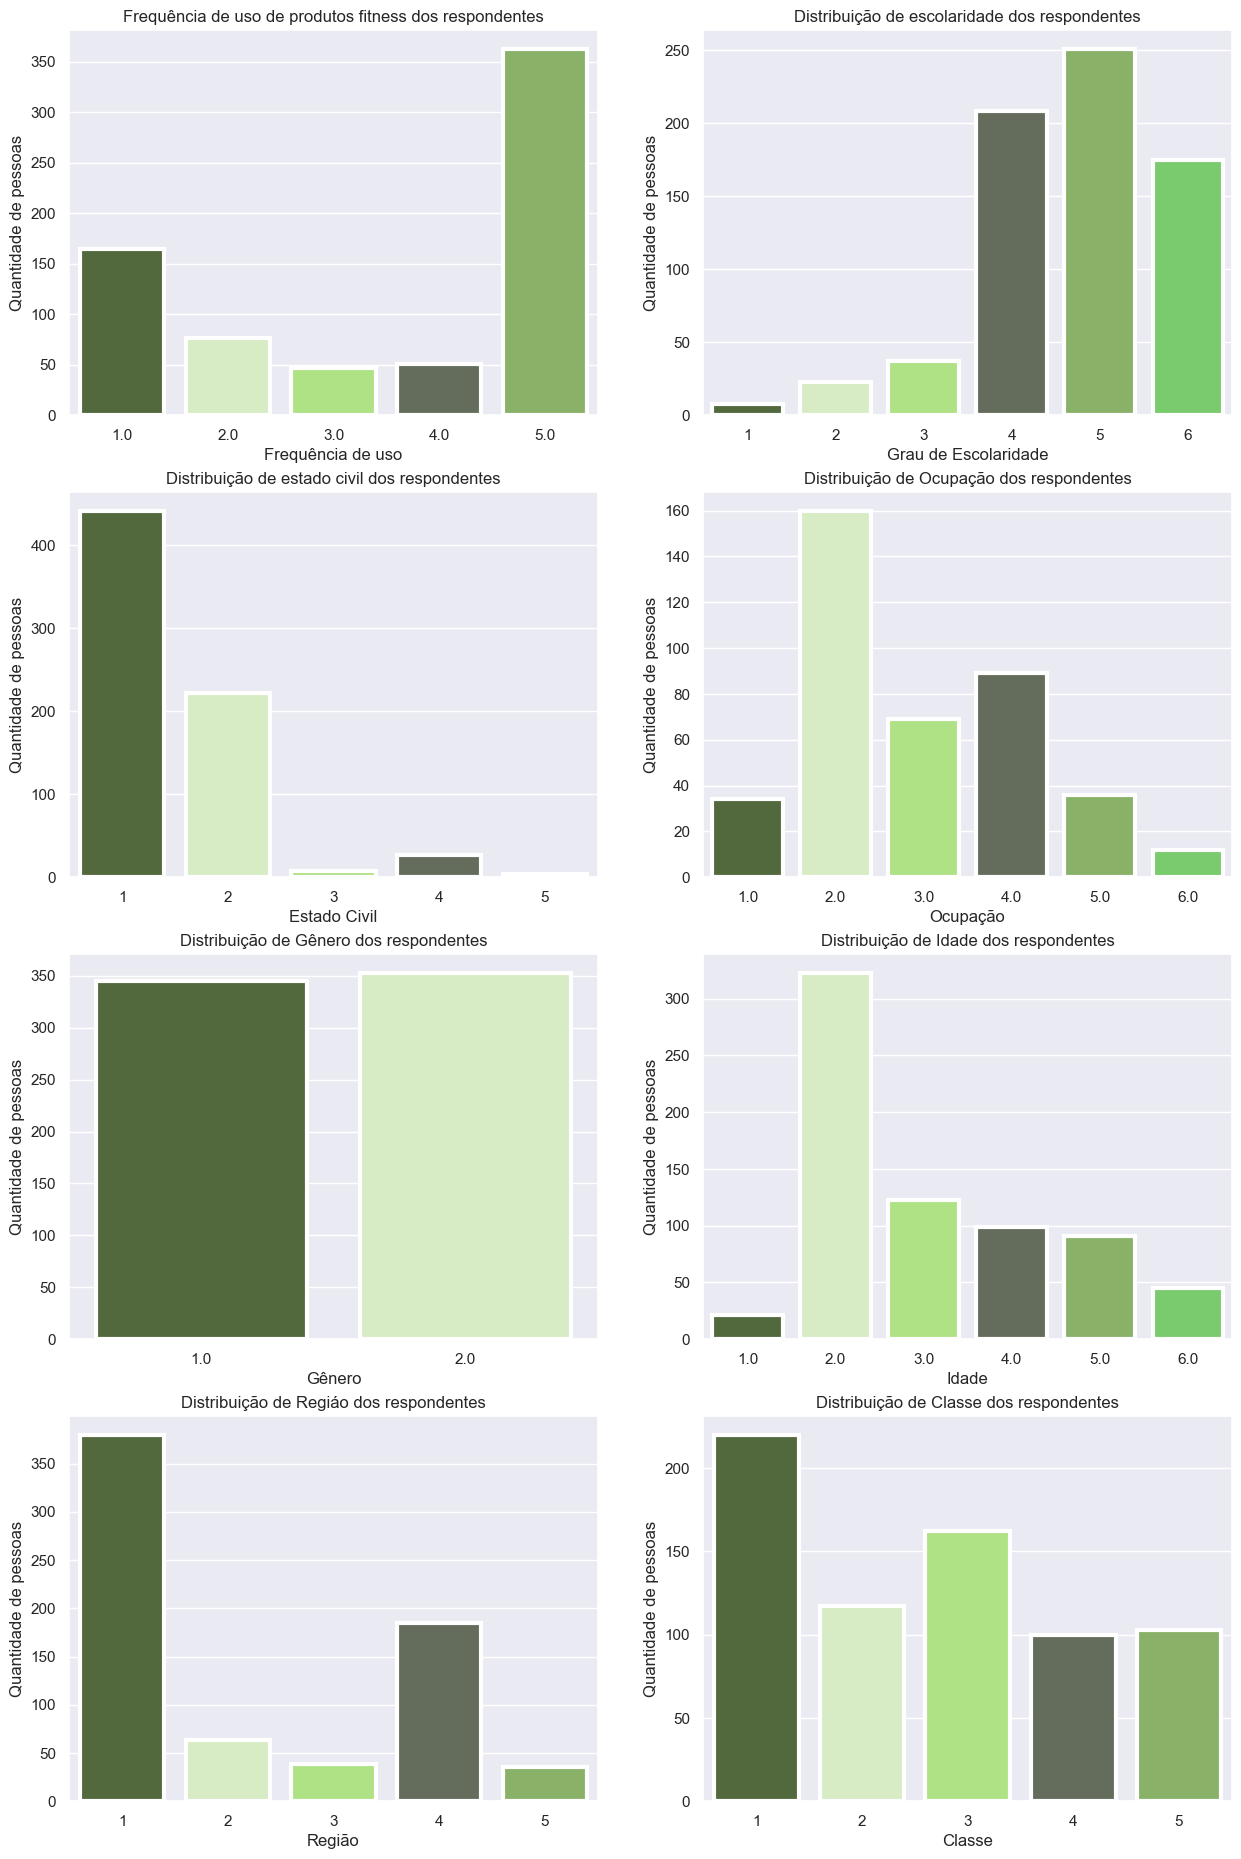

In [273]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df, x="Qfreq", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(623)
sns.countplot(data= df, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

In [274]:
df_naousa = df[df.Qfreq==5]

df_naousa

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
7,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,3.0,1.0,2.0,4,5
10,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,5.0,1.0,2.0,3,5
14,5.0,1;3;4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,4.0,1.0,2.0,3,5
15,5.0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,3.0,1.0,1.0,4,5
17,5.0,7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,2,2.0,1.0,2.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,5.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,2.0,2.0,1,1
698,5.0,1; 5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,1,NaN,1.0,2.0,1,2
699,5.0,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,2,NaN,2.0,4.0,4,1
700,5.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,1.0,2.0,4,5


In [275]:
df_naousa.iloc[:,[0,1,2,24,25,26,27,28,29,30]].describe()



,Qfreq,P3,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,363.0,363.000000,363.000000,363.000000,139.000000,361.000000,363.000000,363.000000,363.000000
mean,5.0,4.088154,4.867769,1.402204,3.021583,1.476454,2.920110,2.123967,2.074380
std,0.0,2.043166,0.965786,0.675699,1.236332,0.500138,1.342755,1.384026,1.303408
min,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.0,2.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,5.0,4.000000,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000
75%,5.0,6.000000,6.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000
max,5.0,7.000000,6.000000,5.000000,6.000000,2.000000,6.000000,5.000000,5.000000


Text(0.5, 0, 'Utilizariam produtos se fossem mais baratos')

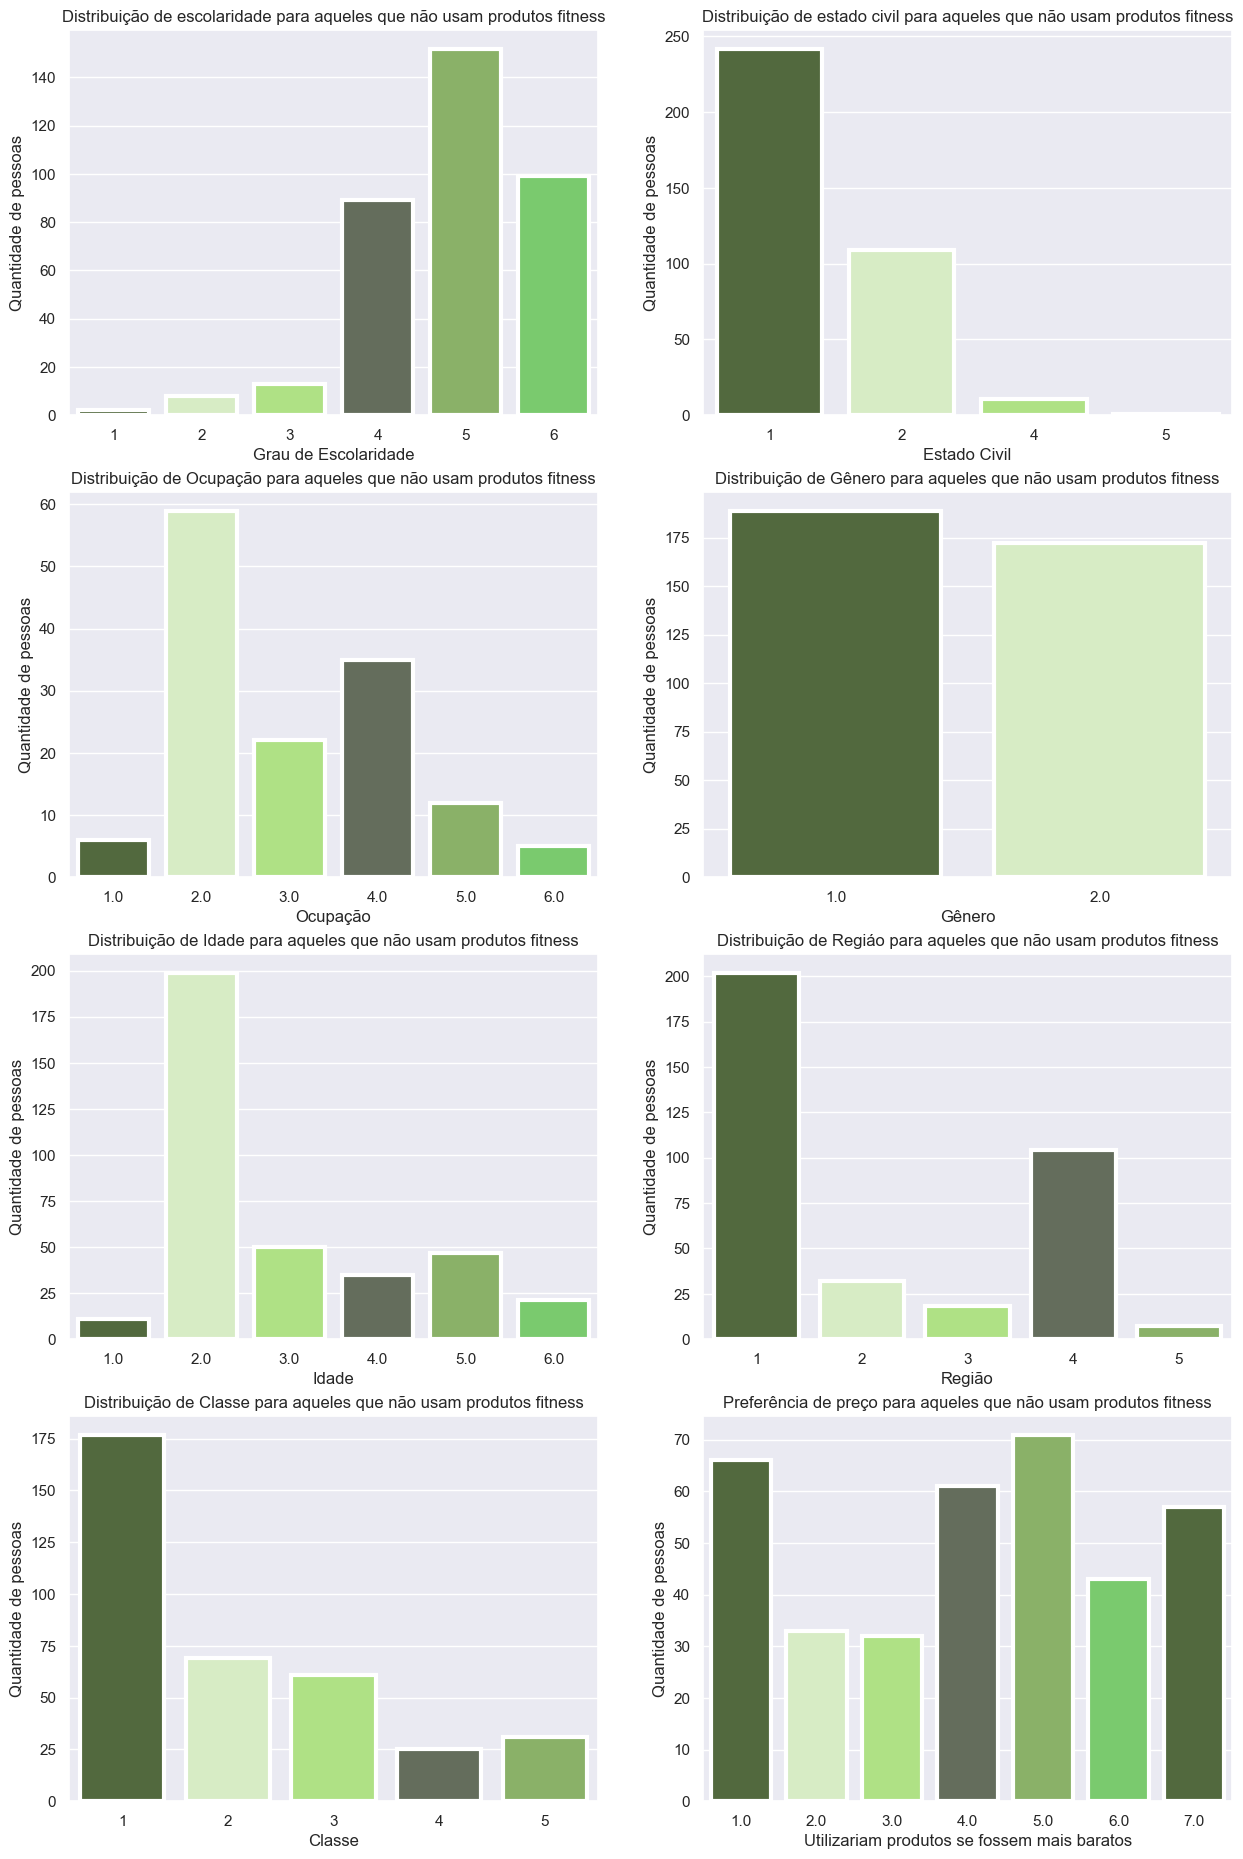

In [276]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_naousa, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(622)
sns.countplot(data= df_naousa, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_naousa, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_naousa, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(625)
sns.countplot(data= df_naousa, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(626)
sns.countplot(data= df_naousa, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(627)
sns.countplot(data= df_naousa, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

plt.subplot(628)
sns.countplot(data= df_naousa, x="P3", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Preferência de preço para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Utilizariam produtos se fossem mais baratos')


In [277]:
df_naosup = df[df.P12==2]
df_naosup.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,84.000000,0.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,0.0,0.0,...,0.0,0.0,0.0,84.000000,84.000000,65.000000,83.000000,84.000000,84.000000,84.000000
mean,1.797619,NaN,4.440476,2.964286,3.476190,4.333333,4.000000,3.321429,NaN,NaN,...,NaN,NaN,NaN,4.440476,1.452381,2.953846,1.566265,3.214286,2.083333,3.345238
std,1.027100,NaN,2.299037,2.386945,2.351499,2.251283,2.578876,2.593601,NaN,NaN,...,NaN,NaN,NaN,1.165273,0.665949,1.178330,0.498602,1.326935,1.424471,1.392701
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,2.000000,1.000000,1.000000,2.750000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,1.000000,NaN,4.500000,1.500000,3.500000,4.000000,4.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.500000
75%,3.000000,NaN,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000,NaN,NaN,...,NaN,NaN,NaN,5.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,NaN,NaN,...,NaN,NaN,NaN,6.000000,4.000000,6.000000,2.000000,6.000000,5.000000,5.000000


Text(0.5, 0, 'AutoPrescrição')

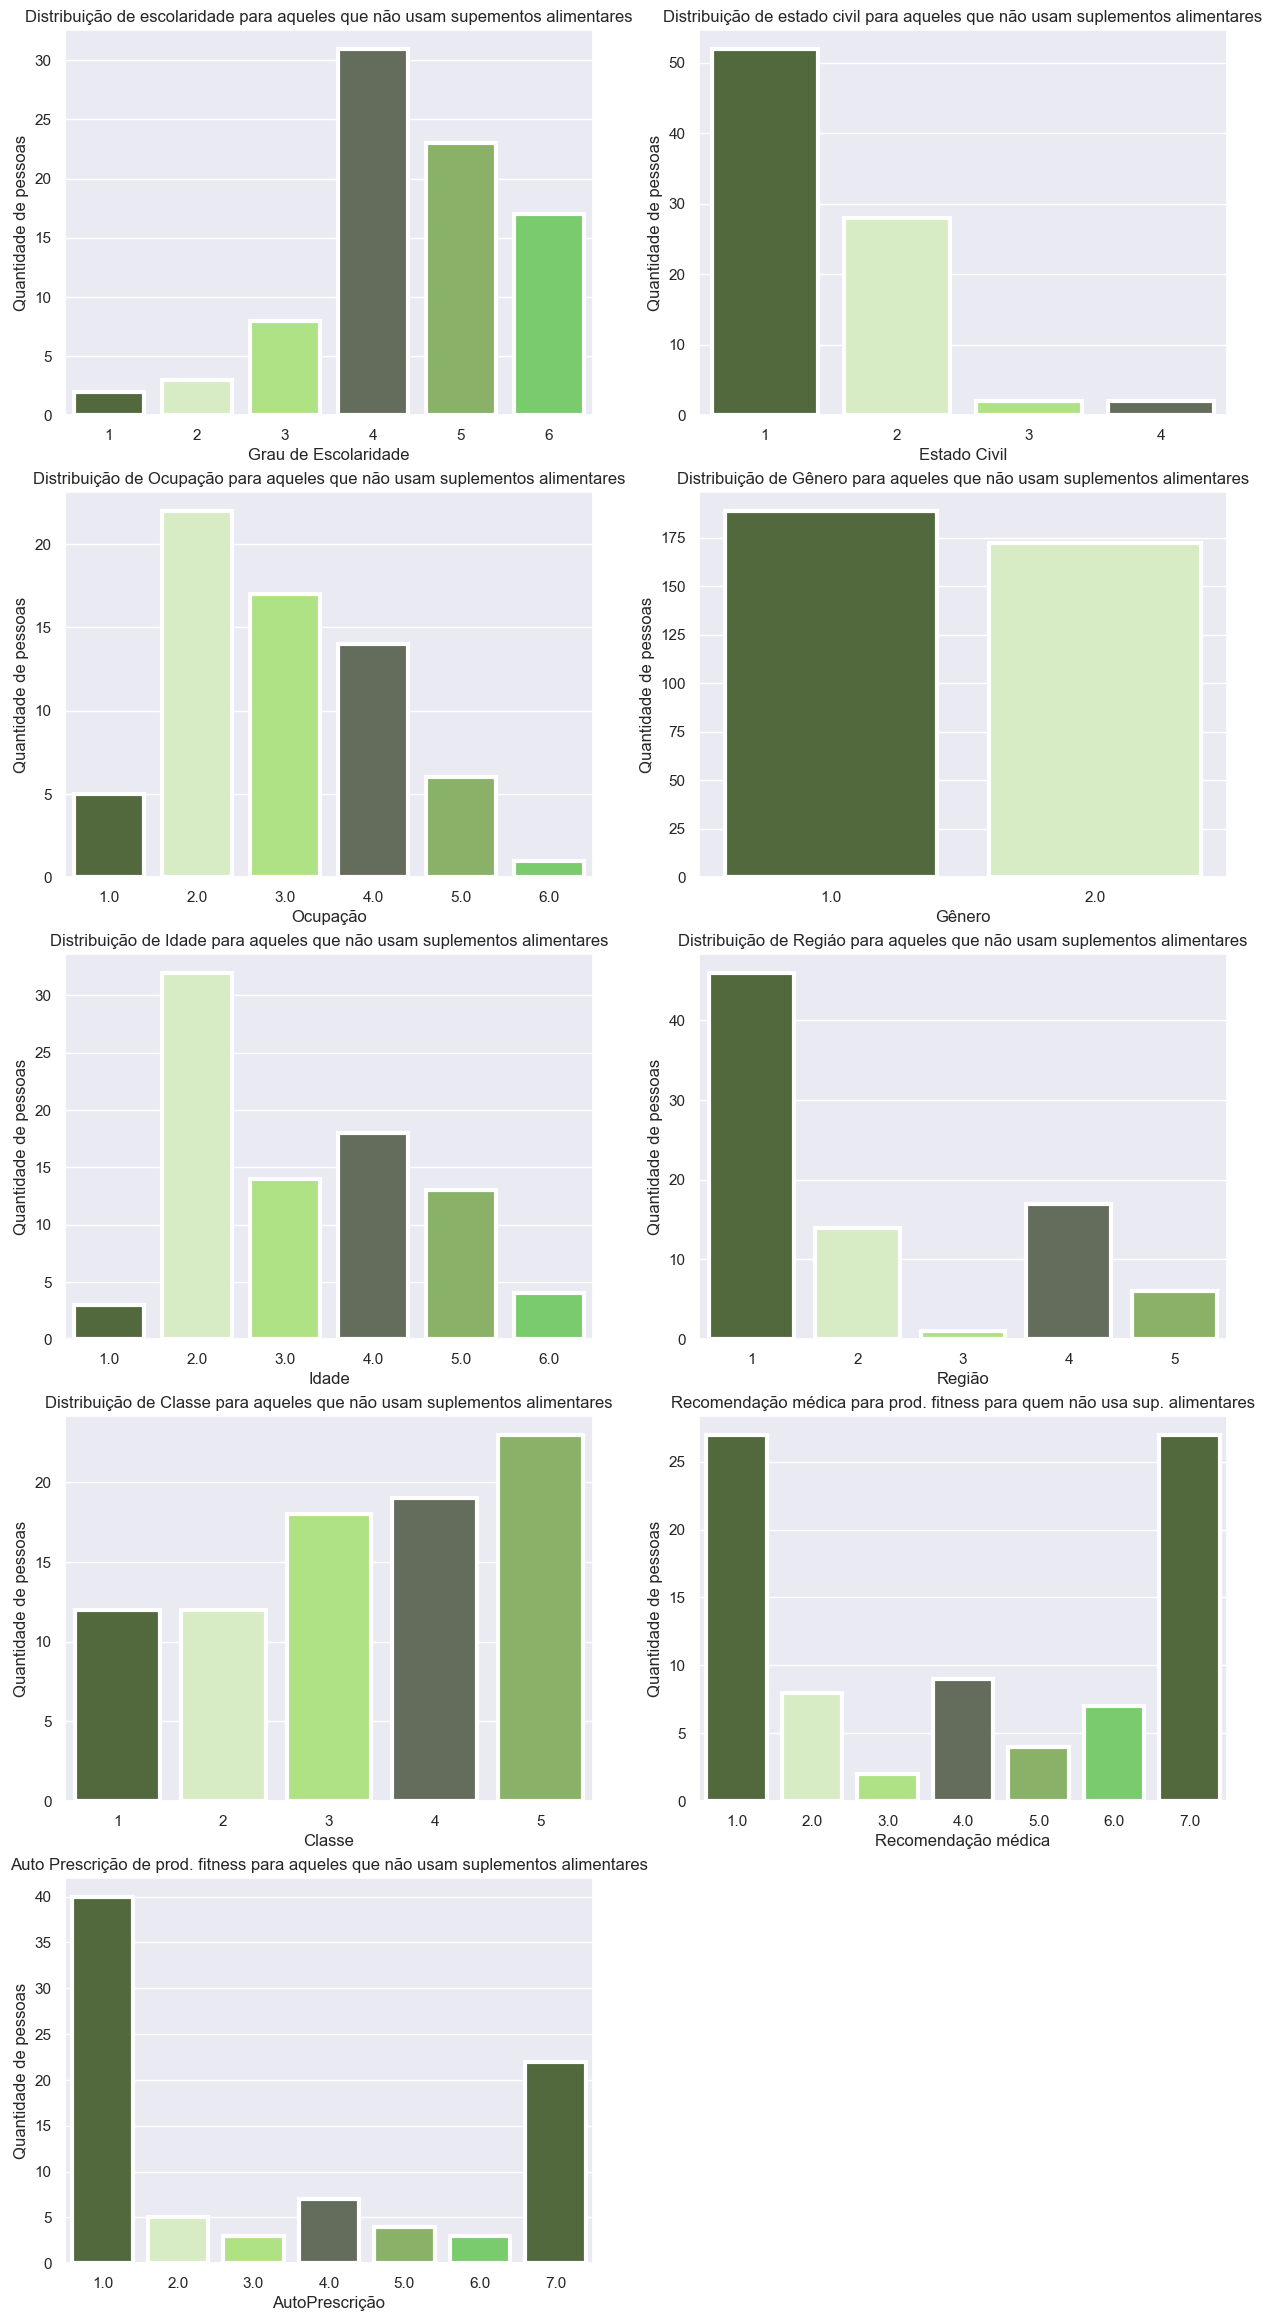

In [278]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_naosup, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade para aqueles que não usam supementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(622)
sns.countplot(data= df_naosup, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_naosup, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_naousa, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(625)
sns.countplot(data= df_naosup, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(626)
sns.countplot(data= df_naosup, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(627)
sns.countplot(data= df_naosup, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

plt.subplot(628)
sns.countplot(data= df_naosup, x="P8", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Recomendação médica para prod. fitness para quem não usa sup. alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Recomendação médica')

plt.subplot(629)
sns.countplot(data= df_naosup, x="P9", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Auto Prescrição de prod. fitness para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('AutoPrescrição')

In [279]:
df_usaf = df[df.Qfreq != 5]
df_usa = df_usaf[df_usaf.P12 != 2]
df_usa.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,255.000000,0.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,196.000000,254.000000,255.000000,255.000000,255.000000
mean,2.003922,NaN,5.160784,3.082353,3.733333,4.796078,4.356863,3.776471,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.556863,1.584314,2.841837,1.527559,3.243137,2.321569,3.219608
std,1.131155,NaN,2.002369,2.296240,2.359323,1.894247,2.477080,2.541203,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.144871,0.869286,1.305014,0.500226,1.338299,1.510633,1.254444
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,4.000000,1.000000,1.000000,3.500000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,2.000000,NaN,6.000000,2.000000,4.000000,5.000000,5.000000,4.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000
75%,3.000000,NaN,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000,6.000000,5.000000,5.000000


Text(0.5, 0, 'Classe')

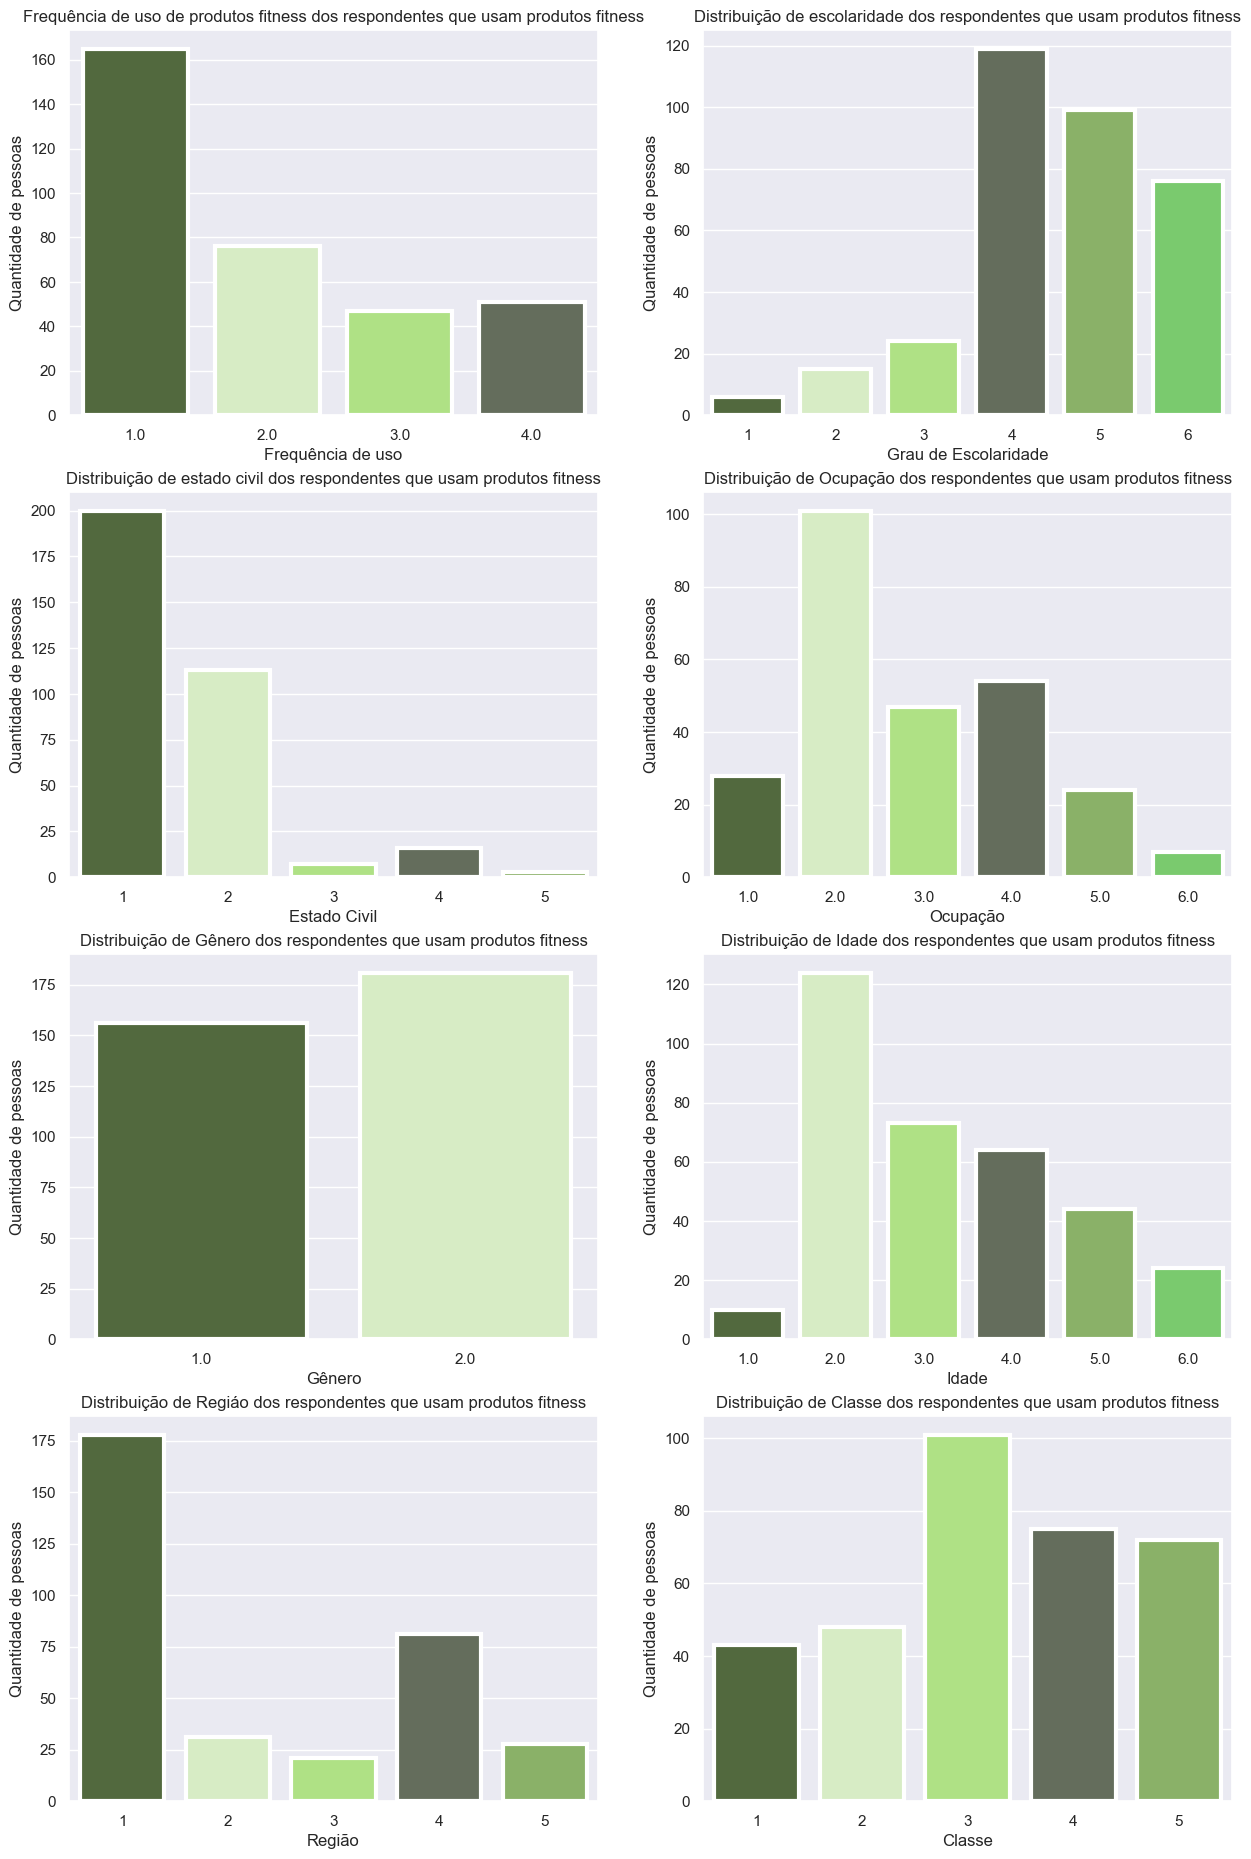

In [280]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_usaf, x="Qfreq", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df_usaf, x="Qesc", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(623)
sns.countplot(data= df_usaf, x="Qciv", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df_usaf, x="Qocup", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df_usaf, x="Qgen", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df_usaf, x="Qid", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df_usaf, x="Qreg", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df_usaf, x="Qclasse", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

ValueError: num must be an integer with 1 <= num <= 12, not 13

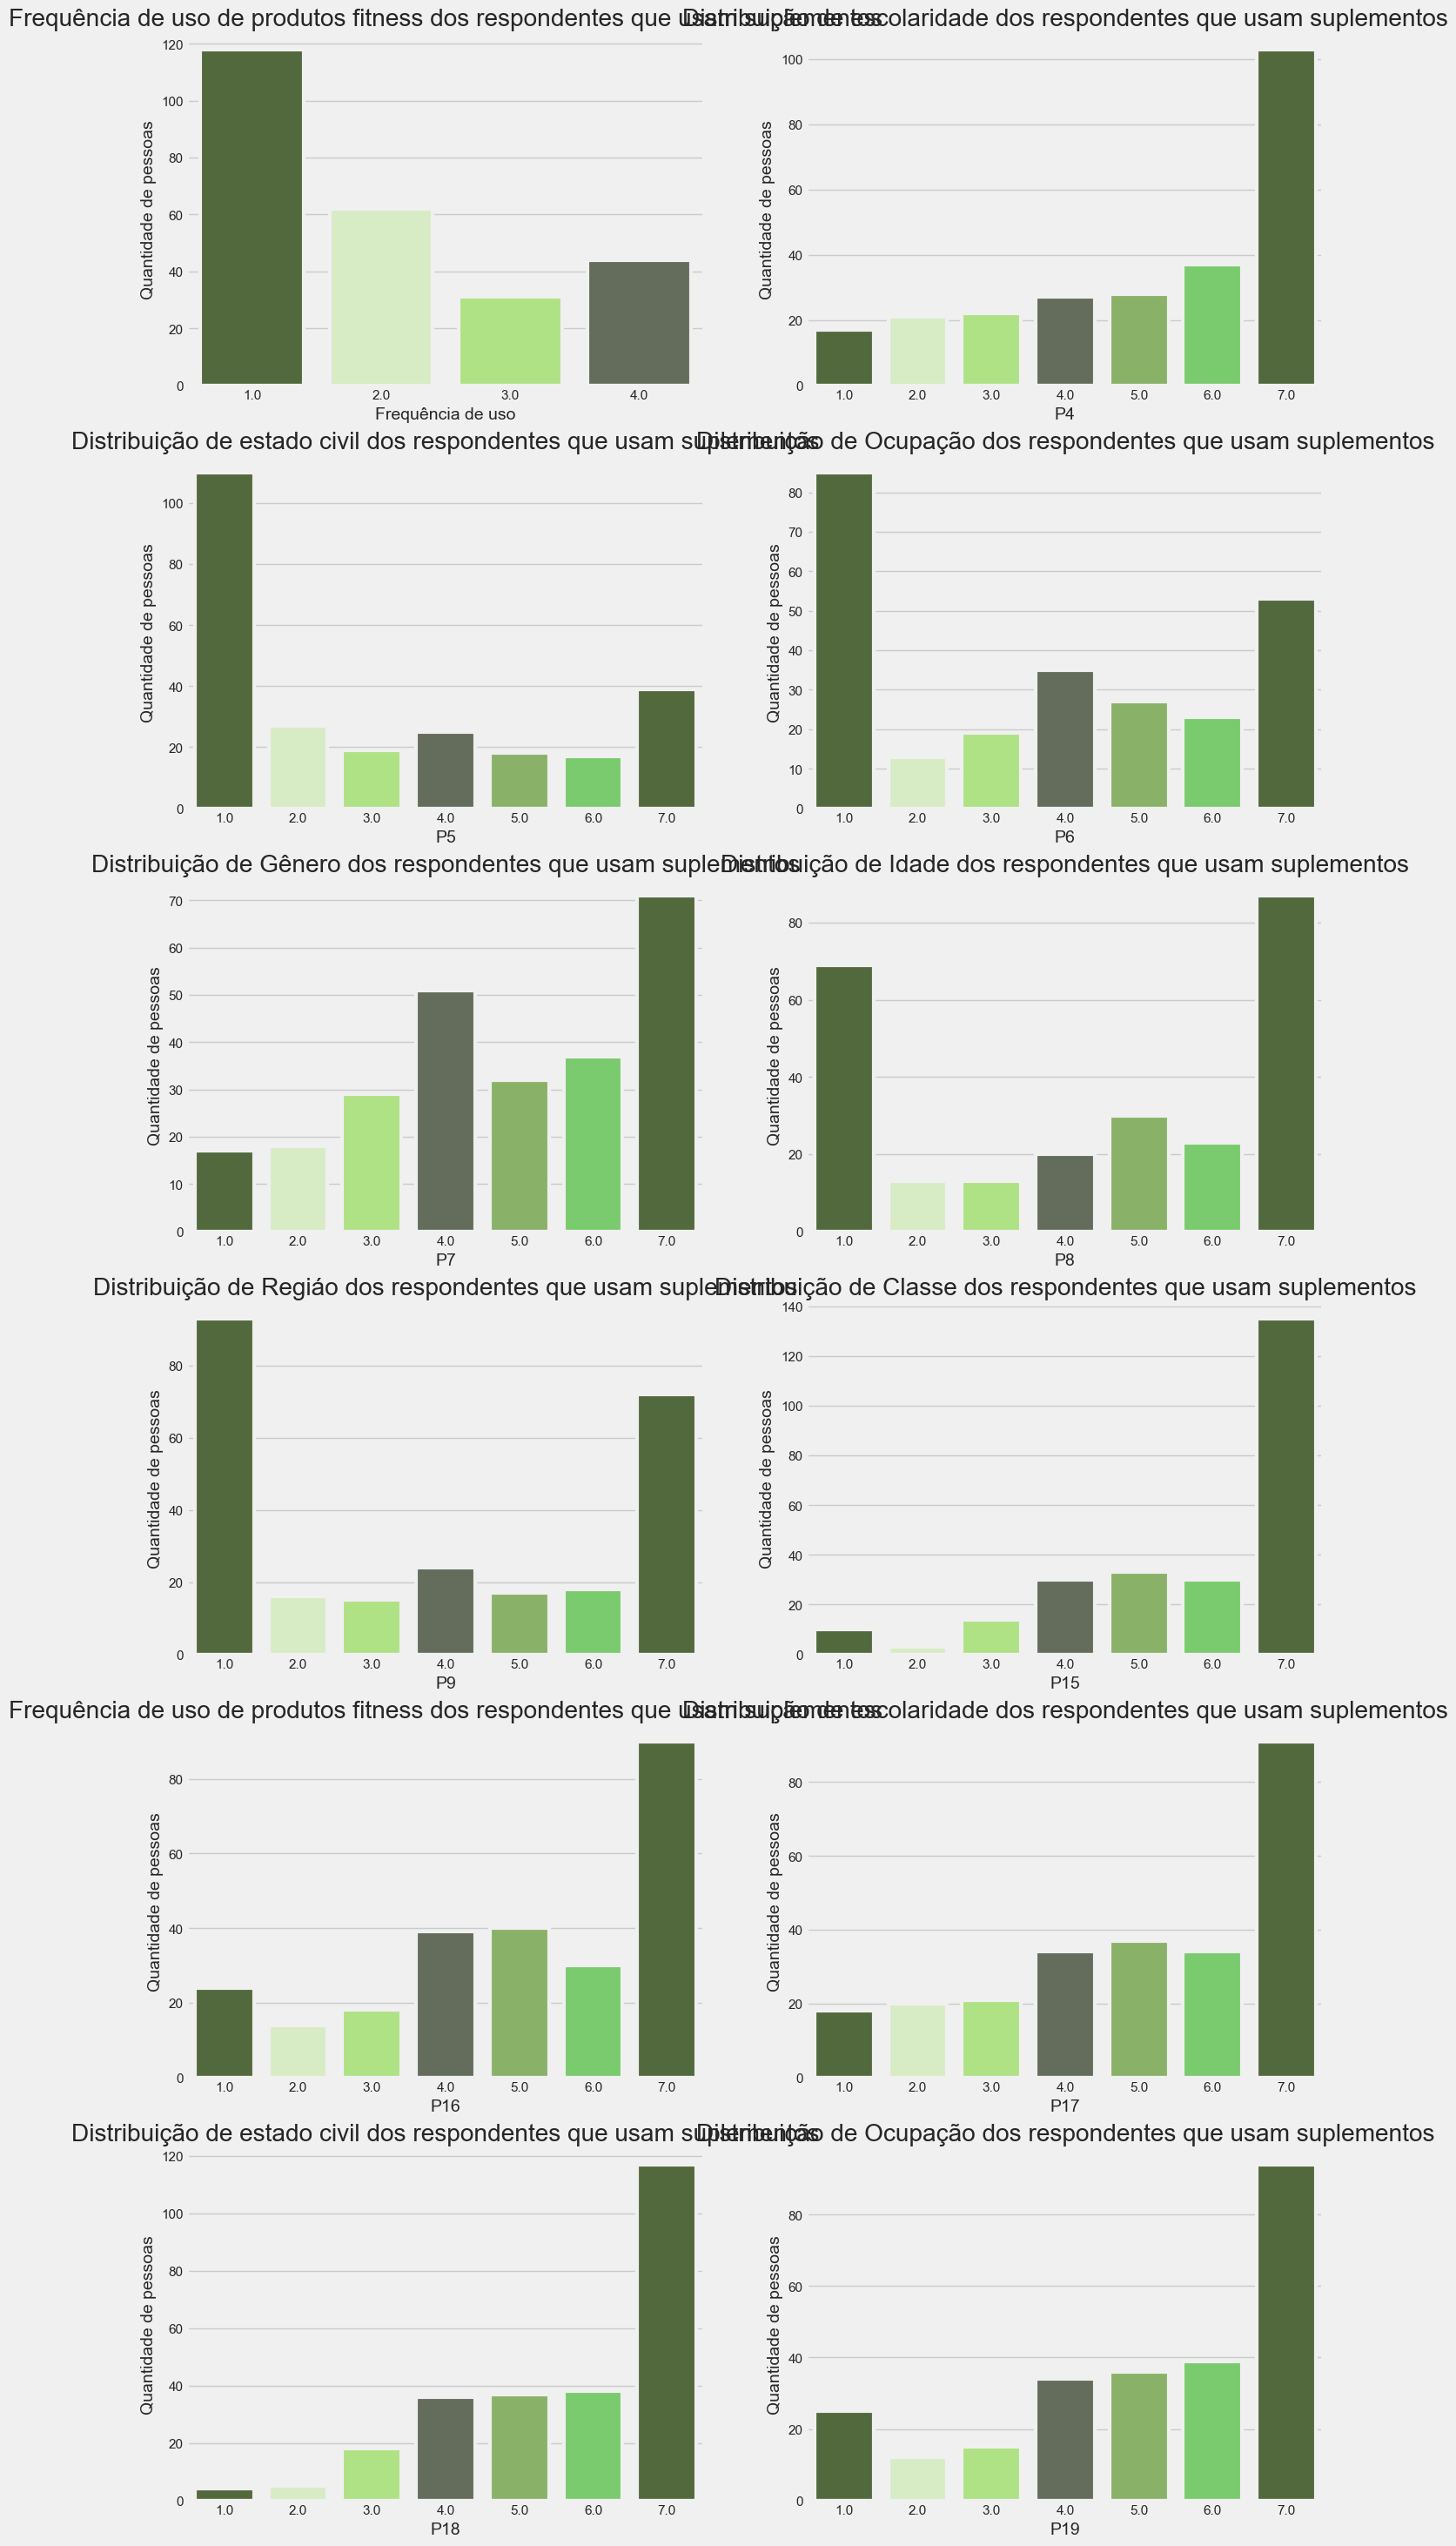

In [676]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_usa, x="Qfreq", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df_usa, x="P4", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P4')

plt.subplot(623)
sns.countplot(data= df_usa, x="P5", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P5')

plt.subplot(624)
sns.countplot(data= df_usa, x="P6", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P6')

plt.subplot(625)
sns.countplot(data= df_usa, x="P7", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P7')

plt.subplot(626)
sns.countplot(data= df_usa, x="P8", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P8')

plt.subplot(627)
sns.countplot(data= df_usa, x="P9", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P9')

plt.subplot(628)
sns.countplot(data= df_usa, x="P15", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P15')

plt.subplot(629)
sns.countplot(data= df_usa, x="P16", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P16')

plt.subplot(6,2,10)
sns.countplot(data= df_usa, x="P17", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P17')

plt.subplot(6,2,11)
sns.countplot(data= df_usa, x="P18", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de estado civil dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P18')

plt.subplot(6,2,12)
sns.countplot(data= df_usa, x="P19", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P19')



Text(0.5, 0, 'P26')

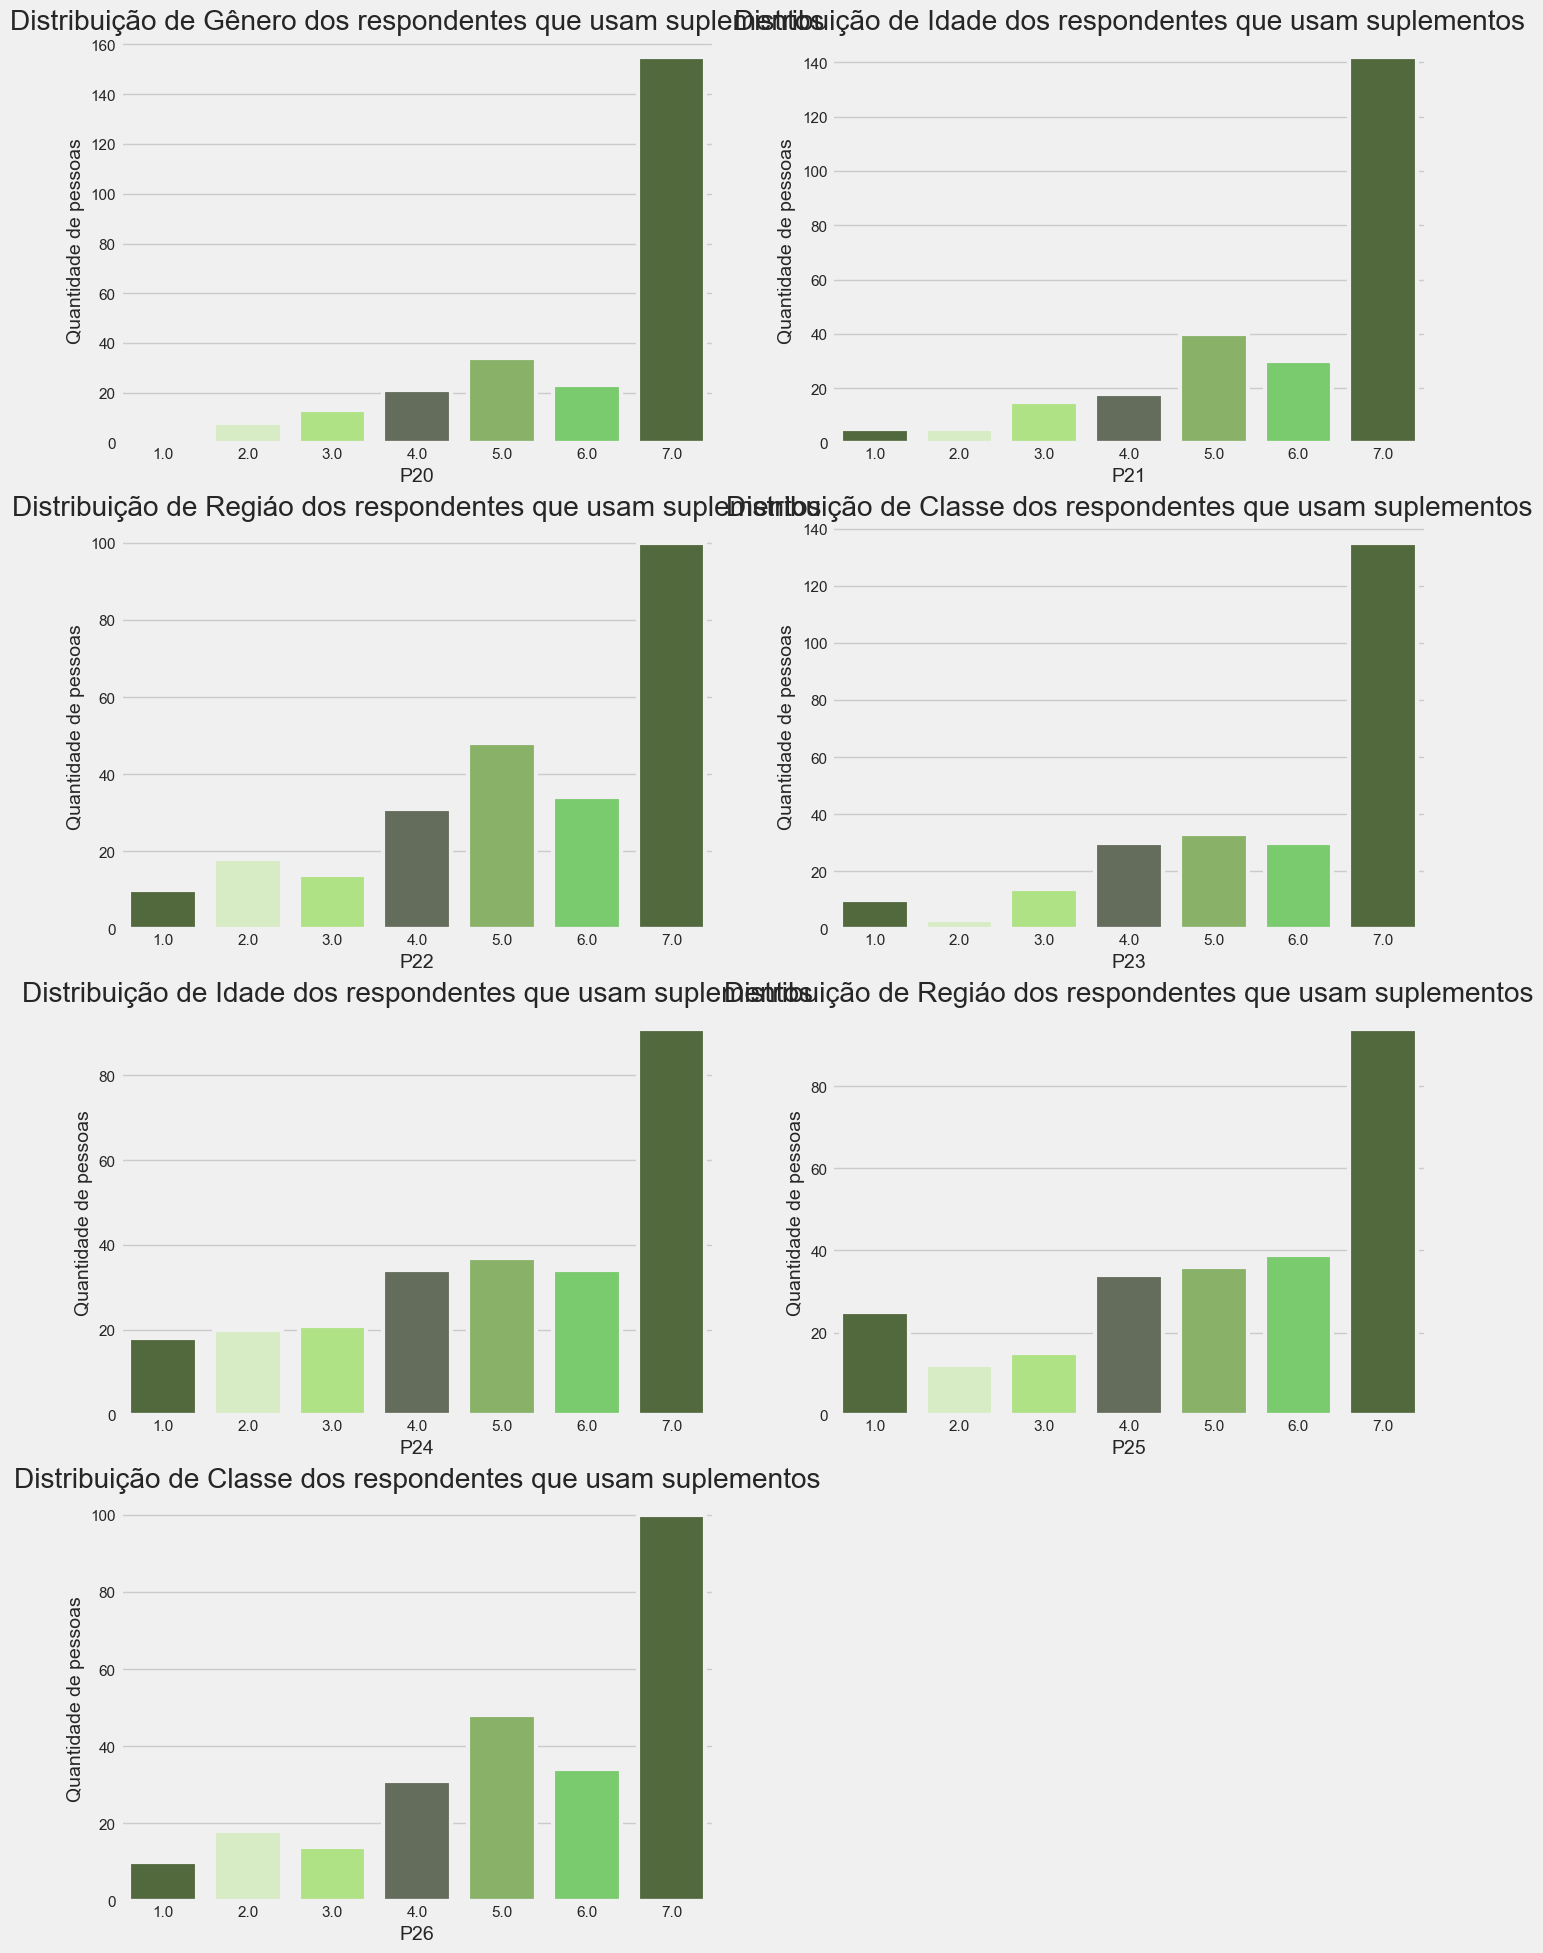

In [677]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(6,2,1)
sns.countplot(data= df_usa, x="P20", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Gênero dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P20')

plt.subplot(6,2,2)
sns.countplot(data= df_usa, x="P21", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P21')

plt.subplot(6,2,3)
sns.countplot(data= df_usa, x="P22", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P22')

plt.subplot(6,2,4)
sns.countplot(data= df_usa, x="P23", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P23')

plt.subplot(6,2,5)
sns.countplot(data= df_usa, x="P24", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P24')

plt.subplot(6,2,6)
sns.countplot(data= df_usa, x="P25", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P25')

plt.subplot(6,2,7)
sns.countplot(data= df_usa, x="P26", palette = ["#527037", "#D7F2BF", "#AEF076","#647059","#89BD5C","#6ED95F"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('P26')

### Clusterização e Redução de Dimensionalidade

Iniciaremos com duas forma de análise de dados: PCA e Kmeans Cluster

Vamos atribuir algumas perguntas para as classificações em tipos de variáveis

In [992]:
df_usa.Qreg = df_usa.Qreg.astype('category')
df_usa.Qclasse = df_usa.Qclasse.astype('category')
df_usa.Qid = df_usa.Qid.astype('category')

df_usa.Qreg.cat.rename_categories = [1, 2, 3, 4, 5]
df_usa.Qclasse.cat.rename_categories = [1, 2, 3, 4, 5]
df_usa.Qid.cat.rename_categories =  [1, 2, 3, 4, 5, 6]

C:\Users\loren\AppData\Local\Temp\ipykernel_6728\4254042309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Qreg = df_usa.Qreg.astype('category')
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\4254042309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Qclasse = df_usa.Qclasse.astype('category')
C:\Users\loren\AppData\Local\Temp\ipykernel_6728\4254042309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

### Seleção de perguntas

Agora que a base de dados foi limpa, e selecionamos respondentes que fazem um maior uso de suplementos, podemos selecionar as perguntas mais relevantes para fazermos a noralização e clusterização de base de dados.

Selecionamos as perguntas que estabelecemos ser mais diferenciais para identificar clusters dentro da nossa base de dados.

In [1148]:
df_p = df_usa.loc[:,['P15','P19', 'P22', 'P26']]
df_p.describe()

,P15,P19,P22,P26
count,255.000000,255.000000,255.000000,255.000000
mean,5.756863,5.105882,5.317647,5.317647
std,1.656442,1.998170,1.793767,1.793767
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000
50%,7.000000,6.000000,6.000000,6.000000
75%,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000


In [1149]:
df_p.dtypes

P15    float64
P19    float64
P22    float64
P26    float64
dtype: object

In [1150]:
df_p.isnull().sum()

P15    0
P19    0
P22    0
P26    0
dtype: int64

In [1151]:
df_p = df_p.fillna(df_p.median())
df_p.describe()

,P15,P19,P22,P26
count,255.000000,255.000000,255.000000,255.000000
mean,5.756863,5.105882,5.317647,5.317647
std,1.656442,1.998170,1.793767,1.793767
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000
50%,7.000000,6.000000,6.000000,6.000000
75%,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000


### Normalização da base de dados

Uma vez selecionadas as nossas perguntas e com a base de dados limpa, 

In [1152]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_p)

In [1153]:
pca = PCA()
pca.fit(df_std)

PCA()

In [1154]:
pca.explained_variance_ratio_

array([6.33045585e-01, 2.22700835e-01, 1.44253580e-01, 2.67647611e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

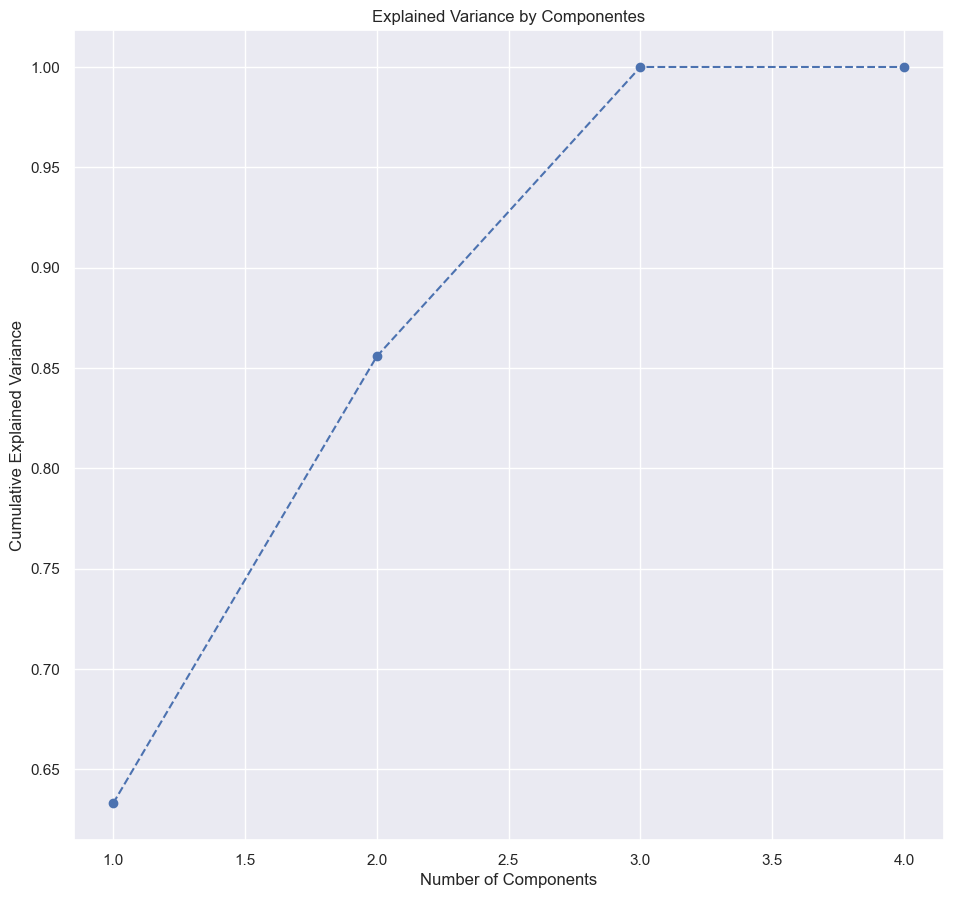

In [1155]:
plt.figure(figsize=(10,10))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')
plt.title('Explained Variance by Componentes')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [1159]:
pca = PCA(n_components = 2)
pca.fit(df_std)

PCA(n_components=2)

In [1160]:
pca.transform(df_std)

array([[-1.77801592e+00, -2.31022961e-01],
       [ 6.15409183e-01, -9.36429488e-01],
       [-3.23133585e-01,  1.90609219e+00],
       [-1.77801592e+00, -2.31022961e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [ 8.56524441e-01,  8.01035321e-01],
       [ 6.53751848e-01,  5.13365765e-01],
       [ 1.09900483e+00,  1.15722118e+00],
       [-1.77801592e+00, -2.31022961e-01],
       [ 1.58396561e+00,  1.86959290e+00],
       [ 8.57889572e-01, -5.80243630e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [ 4.36114208e-03,  9.63119745e-01],
       [-7.36893174e-02, -5.55191810e-01],
       [ 1.30314255e+00,  6.36117844e-02],
       [-1.33276293e+00,  4.12832453e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [-1.77801592e+00, -2.31022961e-01],
       [-6.83372228e-01, -3.69215273e-02],
       [-6.83372228e-01, -3.69215273e-02],
       [-1.

In [1161]:
scores_pca = pca.transform(df_std)

In [1162]:
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

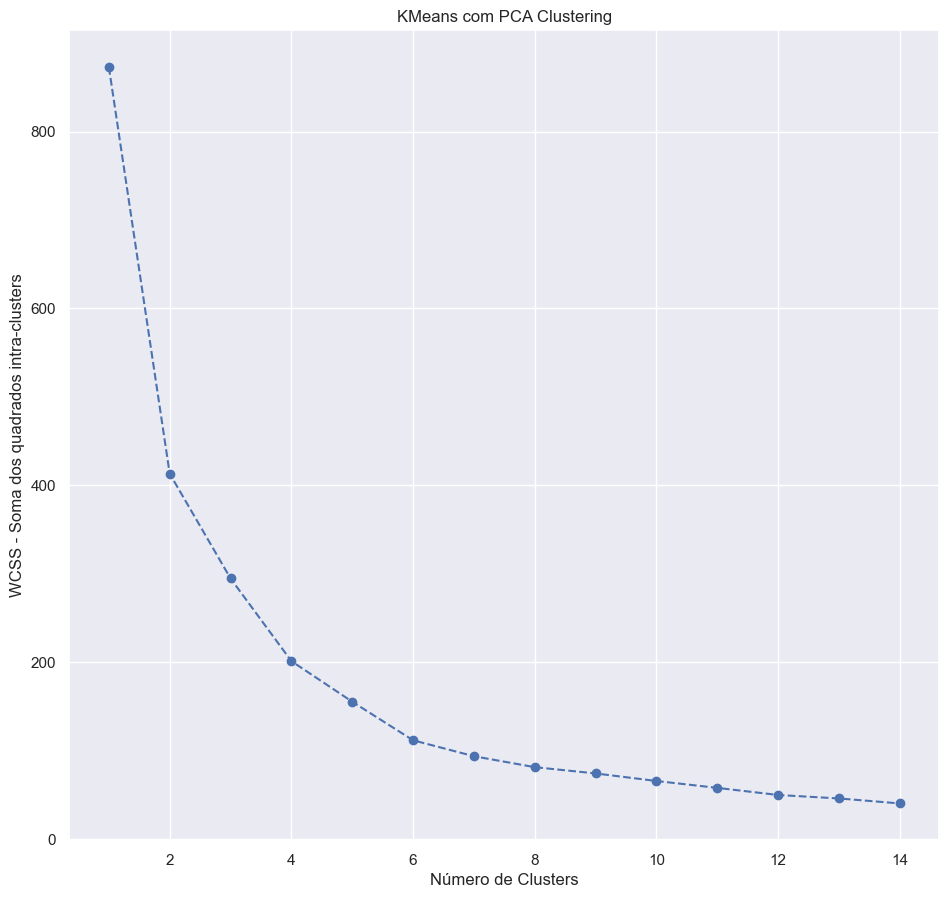

In [1163]:
plt.figure(figsize=(10,10))
plt.plot(range(1,15), wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel('WCSS - Soma dos quadrados intra-clusters')
plt.title("KMeans com PCA Clustering")
plt.show()

In [1165]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=8)
kmeans_pca.fit(scores_pca)


c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=8)

c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\loren\anaconda3.2\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

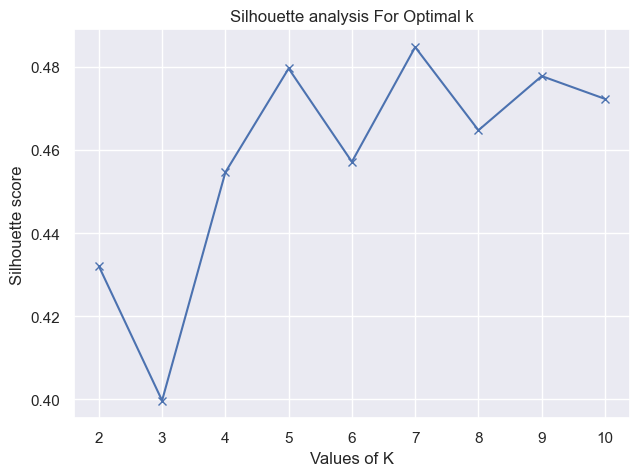

In [1164]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_std)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(df_std, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [1166]:
df_p_pca_kmeans = pd.concat([df_p.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_p_pca_kmeans.columns.values[-3: ] = ['Comp 1', 'Comp 2', 'Comp 3']
df_p_pca_kmeans['Cluster'] = kmeans_pca.labels_

df_p_pca_kmeans.head()

,P15,P19,P22,Comp 1,Comp 2,Comp 3,Cluster
0,7.0,7.0,7.0,7.0,-1.778016,-0.231023,0
1,6.0,6.0,4.0,4.0,0.615409,-0.936429,3
2,1.0,7.0,7.0,7.0,-0.323134,1.906092,4
3,7.0,7.0,7.0,7.0,-1.778016,-0.231023,0
4,7.0,7.0,7.0,7.0,-1.778016,-0.231023,0


In [1167]:
grouped_by_clusters = df_p_pca_kmeans.groupby('Cluster')
grouped_by_clusters.describe()

P15                                                   P19  \
         count      mean       std  min   25%  50%   75%  max  count   
Cluster                                                                
0        107.0  6.822430  0.451686  5.0  7.00  7.0  7.00  7.0  107.0   
1         24.0  2.958333  1.601064  1.0  1.75  3.0  3.25  7.0   24.0   
2         28.0  6.571429  0.835711  4.0  6.75  7.0  7.00  7.0   28.0   
3         57.0  4.807018  1.245543  1.0  4.00  5.0  5.00  7.0   57.0   
4         39.0  5.358974  1.813505  1.0  4.50  6.0  7.00  7.0   39.0   

                   ...    Comp 2           Comp 3                      \
             mean  ...       75%       max  count      mean       std   
Cluster            ...                                                  
0        6.644860  ... -1.128625 -0.236754  107.0 -0.237948  0.360737   
1        2.000000  ...  3.726383  4.789846   24.0  0.623016  0.750000   
2        5.642857  ...  2.077255  2.929419   28.0 -1.727919  0.633843   
3        4.385965  ...  1.303143  1.748396   57.0  0.228967  0.574686   
4        3.461538  ... -0.137416  1.097640   39.0  1.175348  0.633351   

                                                           
              min       25%       50%       75%       max  
Cluster                                                    
0       -1.130531 -0.231023 -0.231023 -0.231023  0.631986  
1       -1.203530  0.281726  0.545383  1.020270  2.732602  
2       -2.929547 -2.215515 -1.679577 -1.168690 -0.673812  
3       -0.936429 -0.130490  0.157180  0.513366  1.869593  
4        0.250748  0.831811  1.125204  1.494994  3.344440  

[5 rows x 48 columns]

In [1168]:
df_p_pca_kmeans['Segment'] = df_p_pca_kmeans['Cluster'].map({0:'Cluster 1',
                                                                1: 'Cluster 2',
                                                                2: 'Cluster 3',
                                                                3: 'Cluster 4',
                                                                4: 'Cluster 5'}) 

In [1169]:
print(len(df_p_pca_kmeans.columns))
vars = df_p_pca_kmeans.columns[0:4]
col_cluster = df_p_pca_kmeans.columns[7:8]
print(col_cluster)
vars = vars.append(col_cluster)
print(vars)

8
Index(['Segment'], dtype='object')
Index(['P15', 'P19', 'P22', 'Comp 1', 'Segment'], dtype='object')


In [1170]:
df_p_pca_kmeans.columns

cluster_0 =df_p_pca_kmeans[df_p_pca_kmeans.Cluster == 0]
cluster_1 =df_p_pca_kmeans[df_p_pca_kmeans.Cluster == 1]
cluster_2 =df_p_pca_kmeans[df_p_pca_kmeans.Cluster == 2]
cluster_3 =df_p_pca_kmeans[df_p_pca_kmeans.Cluster == 3]
cluster_4 =df_p_pca_kmeans[df_p_pca_kmeans.Cluster == 4]

lclusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]

df_p_pca_kmeans.describe()

,P15,P19,P22,Comp 1,Comp 2,Comp 3,Cluster
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,2.550000e+02,255.000000
mean,5.756863,5.105882,5.317647,5.317647,-9.752547e-17,6.966105e-18,1.596078
std,1.656442,1.998170,1.793767,1.793767,1.594413e+00,9.456799e-01,1.566625
min,1.000000,1.000000,1.000000,1.000000,-1.778016e+00,-2.929547e+00,0.000000
25%,5.000000,4.000000,4.000000,4.000000,-1.575243e+00,-2.492726e-01,0.000000
50%,7.000000,6.000000,6.000000,6.000000,-2.764619e-01,-6.197335e-02,1.000000
75%,7.000000,7.000000,7.000000,7.000000,1.160683e+00,5.133658e-01,3.000000
max,7.000000,7.000000,7.000000,7.000000,4.789846e+00,3.344440e+00,4.000000


In [1172]:
#cluster_x_freq = pd.crosstab(df_p_pca_kmeans['Cluster'], df_p_pca_kmeans['Qfreq'], normalize='index',margins=True).round(3)*100
#cluster_x_freq

Olhando para a persona do Cluster selecionado: Cluster 1 - 136 pessoas.

In [1174]:
cluster_sel = cluster_0
cluster_sel.describe()

,P15,P19,P22,Comp 1,Comp 2,Comp 3,Cluster
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.0
mean,6.822430,6.644860,6.616822,6.616822,-1.414114,-0.237948,0.0
std,0.451686,0.676455,0.681907,0.681907,0.508551,0.360737,0.0
min,5.000000,4.000000,5.000000,5.000000,-1.778016,-1.130531,0.0
25%,7.000000,6.000000,6.000000,6.000000,-1.778016,-0.231023,0.0
50%,7.000000,7.000000,7.000000,7.000000,-1.778016,-0.231023,0.0
75%,7.000000,7.000000,7.000000,7.000000,-1.128625,-0.231023,0.0
max,7.000000,7.000000,7.000000,7.000000,-0.236754,0.631986,0.0


In [1175]:
indices_cluster1 = cluster_sel.index.values.tolist()
print(list(cluster_sel.index.values.tolist()))

[0, 3, 4, 5, 9, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 35, 39, 40, 41, 45, 48, 49, 51, 53, 54, 57, 61, 66, 67, 75, 77, 80, 82, 88, 91, 97, 98, 100, 101, 102, 103, 106, 108, 109, 110, 115, 117, 119, 121, 122, 126, 127, 132, 133, 135, 136, 141, 142, 143, 144, 145, 146, 148, 152, 158, 159, 160, 166, 167, 172, 173, 176, 180, 182, 184, 185, 188, 189, 191, 193, 202, 206, 207, 210, 212, 219, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 241, 242, 245, 247, 249, 250]


In [1176]:
print(len(indices_cluster1))

107


In [1177]:
df_analisef = df_usa.iloc[indices_cluster1,:]

In [1178]:
df_analisef.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P21,P22,P23,P24,P25,P26,Qesc,Qciv,Qocup,Qgen
count,107.000000,0.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,85.000000,107.000000
mean,2.037383,NaN,5.429907,3.364486,4.056075,5.299065,4.672897,4.355140,6.822430,6.355140,...,6.766355,6.616822,6.822430,6.299065,6.644860,6.616822,4.654206,1.588785,2.741176,1.523364
std,1.148627,NaN,2.060922,2.534265,2.509724,1.854189,2.546828,2.639512,0.451686,1.134804,...,0.734326,0.681907,0.451686,1.268002,0.676455,0.681907,1.125207,0.812093,1.245496,0.501804
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,1.000000,5.000000,5.000000,1.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,4.000000,1.000000,1.000000,4.000000,1.500000,1.000000,7.000000,6.000000,...,7.000000,6.000000,7.000000,6.000000,6.000000,6.000000,4.000000,1.000000,2.000000,1.000000
50%,2.000000,NaN,7.000000,2.000000,4.000000,6.000000,6.000000,5.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,1.000000,2.000000,2.000000
75%,3.000000,NaN,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,2.000000,4.000000,2.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000


In [1179]:
df_analisef.Qid.value_counts()

2    40
4    25
3    21
5    13
6     7
1     1
Name: Qid, dtype: int64

In [1180]:
lista_marcas = []
lista_marcas = df_analisef.P13.to_list()


lista_m = []
for j in lista_marcas:
    if isinstance(j, str):
        item = j.split(';')
        lista_m.append(item)
    elif isinstance(j, int):
        lista_m.append(j)
    elif isinstance(j, float):
        lista_m.append(j)

lista_m

[['2 ', ' 4 ', ' 6'],
 ['2 ', ' 4'],
 4,
 2,
 4,
 nan,
 ['4 ', ' 6'],
 ['1 ', ' 2 ', ' 4'],
 4,
 ['2 ', ' 3 ', ' 4 ', ' 6'],
 4,
 ['4 ', ' 8'],
 ['1 ', ' 4'],
 ['1 ', ' 4 ', ' 5 ', ' 7'],
 ['4 ', ' 6'],
 ['4 ', ' 6'],
 ['1 ', ' 4'],
 ['4 ', ' 6'],
 4,
 ['4 ', ' 5'],
 ['4 ', ' 6'],
 ['2 ', ' 4 ', ' 6'],
 ['1 ', ' 4 ', ' 6'],
 ['2 ', ' 4'],
 ['1 ', ' 4 ', ' 5 ', ' 6'],
 ['1 ', ' 4 ', ' 6'],
 4,
 4,
 4,
 ['1 ', ' 4'],
 6,
 4,
 ['4 ', ' 6'],
 1,
 4,
 7,
 ['4 ', ' 6'],
 ['2 ', ' 4 ', ' 6'],
 1,
 ['1 ', ' 4 ', ' 6'],
 ['4 ', ' 6'],
 1,
 ['1 ', ' 4 ', ' 5 ', ' 6'],
 4,
 ['Tri ', ' 4'],
 ['2 ', ' 4 ', ' 6'],
 ['2 ', ' 4'],
 4,
 ['1 ', ' 2 ', ' 3 ', ' 4'],
 ['1 ', ' 4'],
 ['2 ', ' 4 ', ' 6'],
 ['1 ', ' 4'],
 ['1 ', ' 4 ', ' 6'],
 ['1 ', ' 4 ', ' 6 ', ' 7'],
 ['4 ', ' 6 ', ' 8'],
 ['2 ', ' 6'],
 6,
 ['4 ', ' 6'],
 ['4 ', ' 6'],
 5,
 ['1 ', ' 4'],
 ['1 ', ' 4'],
 ['4 ', ' 6'],
 ['2 ', ' 4 ', ' 6'],
 [' 4 ', ' 6'],
 4,
 4,
 6,
 ['2 ', ' 4 ', ' 6'],
 1,
 ['4 ', ' 6'],
 ['1 ', ' 4 ', ' 6'],
 ['2 ', 

Função para converter as respostas em números, para que possamos fazer a normalização da base de dados.

In [1181]:
def convert_to_num(s):
    try:
        return int(s)
    except ValueError:
        try:
            return float(s)
        except ValueError:
            return 3

Transformando em uma única lista de respostas, para que possamos fazer a normalização da base de dados.

In [1182]:

flat_list = list(chain.from_iterable([i if isinstance(i, list) else [i] for i in lista_m]))



Removendo os espaços em branco, convertendo strings numéricas em números e filtrando valores nulos.

In [1183]:

clean_list = [convert_to_num(i.strip()) if isinstance(i, str) else i for i in flat_list if not isinstance(i, float) or not math.isnan(i)]


count = Counter(clean_list)

print(count)


Counter({4: 76, 6: 49, 1: 34, 2: 22, 5: 13, 3: 7, 7: 6, 8: 5})


O mesmo procedimento será realizado para a Pergunta 14

In [1184]:
lista_sabendo = []
lista_sabendo = df_analisef.P14.to_list()


lista_14 = []
for w in lista_sabendo:
    if isinstance(w, str):
        item = w.split(';')
        lista_14.append(item)
    elif isinstance(w, int):
        lista_14.append(w)
    elif isinstance(w, float):
        lista_14.append(w)

lista_14

[['3 ', ' 5'],
 ['1 ', ' 2'],
 1,
 1,
 2,
 7,
 ['2 ', ' 4 ', ' 6'],
 1,
 ['1 ', ' 7'],
 ['1 ', ' 2 ', ' 3 ', ' 7'],
 1,
 2,
 ['1 ', ' 2 ', ' 3 ', ' 4 ', ' 5 ', ' 6 ', ' 7'],
 ['1 ', ' 2 ', ' 4 ', ' 5 ', ' 7'],
 ['1 ', ' 2 ', ' 3'],
 ['1 ', ' 3 ', ' 4 ', ' 5 ', ' 6 ', ' 7'],
 2,
 2,
 1,
 ['1 ', ' 3'],
 2,
 1,
 2,
 ['1 ', ' 2 ', ' 7'],
 ['2 ', ' 7'],
 3,
 2,
 1,
 3,
 1,
 1,
 1,
 ['1 ', ' 2'],
 1,
 3,
 2,
 2,
 ['1 ', ' 5 ', ' 6'],
 1,
 ['1 ', ' 3 ', ' 5'],
 3,
 2,
 ['1 ', ' 2 ', ' 5'],
 ['1 ', ' 2 ', ' 3 ', ' 4 ', ' 7'],
 2,
 2,
 ['1 ', ' 7'],
 2,
 ['1 ', ' 2 ', ' 3'],
 ['1 ', ' 3 ', ' 7'],
 ['2 ', ' 3 ', ' 4'],
 3,
 ['1 ', ' 2'],
 ['1 ', ' 2 ', ' 7'],
 ['2 ', ' 4 ', ' 5 ', ' 6 ', ' 7'],
 1,
 3,
 ['2 ', ' 3'],
 ['1 ', ' 2'],
 1,
 ['1 ', ' 2 ', ' 4 ', ' 5 ', ' 6'],
 3,
 2,
 ['1 ', ' 7'],
 ['1 ', ' 3 ', ' 6'],
 ['1 ', ' 2 ', ' 3 ', ' 4 ', ' 5 ', ' 6 ', ' 7'],
 1,
 2,
 ['1 ', ' 2 ', ' 4 ', ' 5 ', ' 7'],
 ['1 ', ' 4'],
 ['2 ', ' 4'],
 3,
 ['1 ', ' 2 ', ' 6'],
 ['2 ', ' 7'],
 ['1 ', ' 2 ', ' 3

In [1185]:
lista_unica = list(chain.from_iterable([i if isinstance(i, list) else [i] for i in lista_14]))

In [1186]:
lista_limpa = [convert_to_num(i.strip()) if isinstance(i, str) else i for i in lista_unica if not isinstance(i, float) or not math.isnan(i)]


contador = Counter(lista_limpa)

print(contador)

Counter({1: 58, 2: 57, 3: 31, 7: 19, 4: 17, 6: 15, 5: 14})


Text(0.5, 0, 'Frequência de Academia')

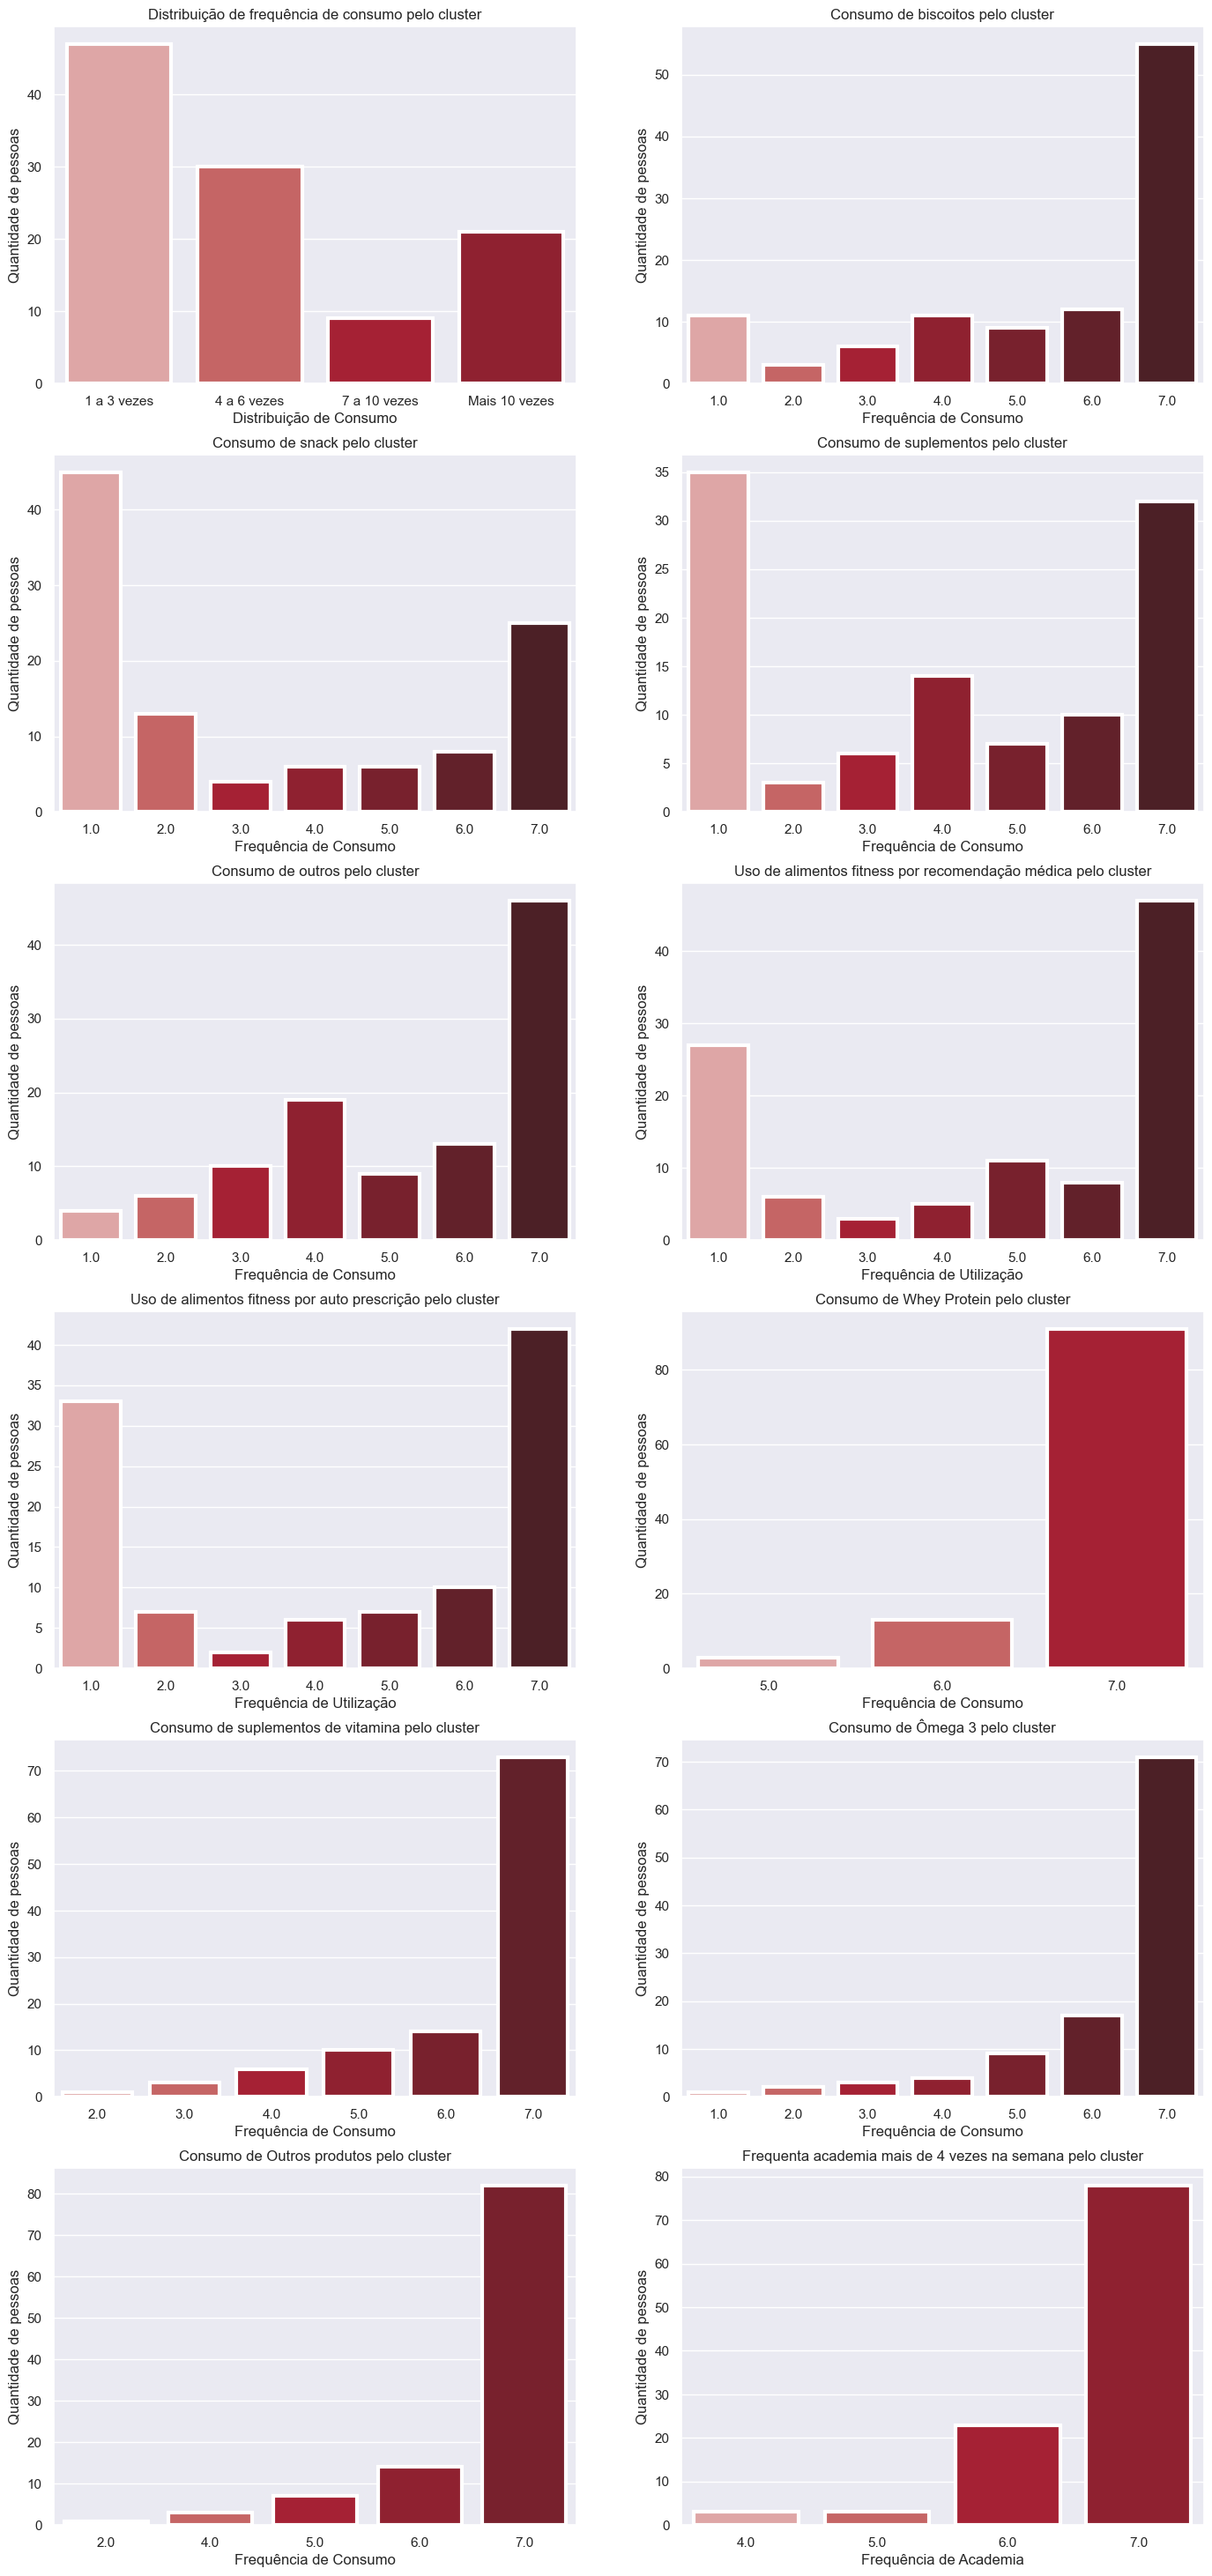

In [1191]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)

sns.countplot(data= df_analisef, x="Qfreq", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de frequência de consumo pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Distribuição de Consumo')

plt.subplot(622)
sns.countplot(data= df_analisef, x="P4", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de biscoitos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(623)
sns.countplot(data= df_analisef, x="P5", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de snack pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(624)
sns.countplot(data= df_analisef, x="P6", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(625)
sns.countplot(data= df_analisef, x="P7", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de outros pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(626)
sns.countplot(data= df_analisef, x="P8", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Uso de alimentos fitness por recomendação médica pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

plt.subplot(627)
sns.countplot(data= df_analisef, x="P9", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Uso de alimentos fitness por auto prescrição pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

plt.subplot(628)
sns.countplot(data= df_analisef, x="P15", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de Whey Protein pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(629)
sns.countplot(data= df_analisef, x="P16", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos de vitamina pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(6,2,10)
sns.countplot(data= df_analisef, x="P17", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de Ômega 3 pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(6,2,11)
sns.countplot(data= df_analisef, x="P18", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de Outros produtos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(6,2,12)
sns.countplot(data= df_analisef, x="P19", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Frequenta academia mais de 4 vezes na semana pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Academia')


Text(0.5, 0, 'Frequência de Utilização')

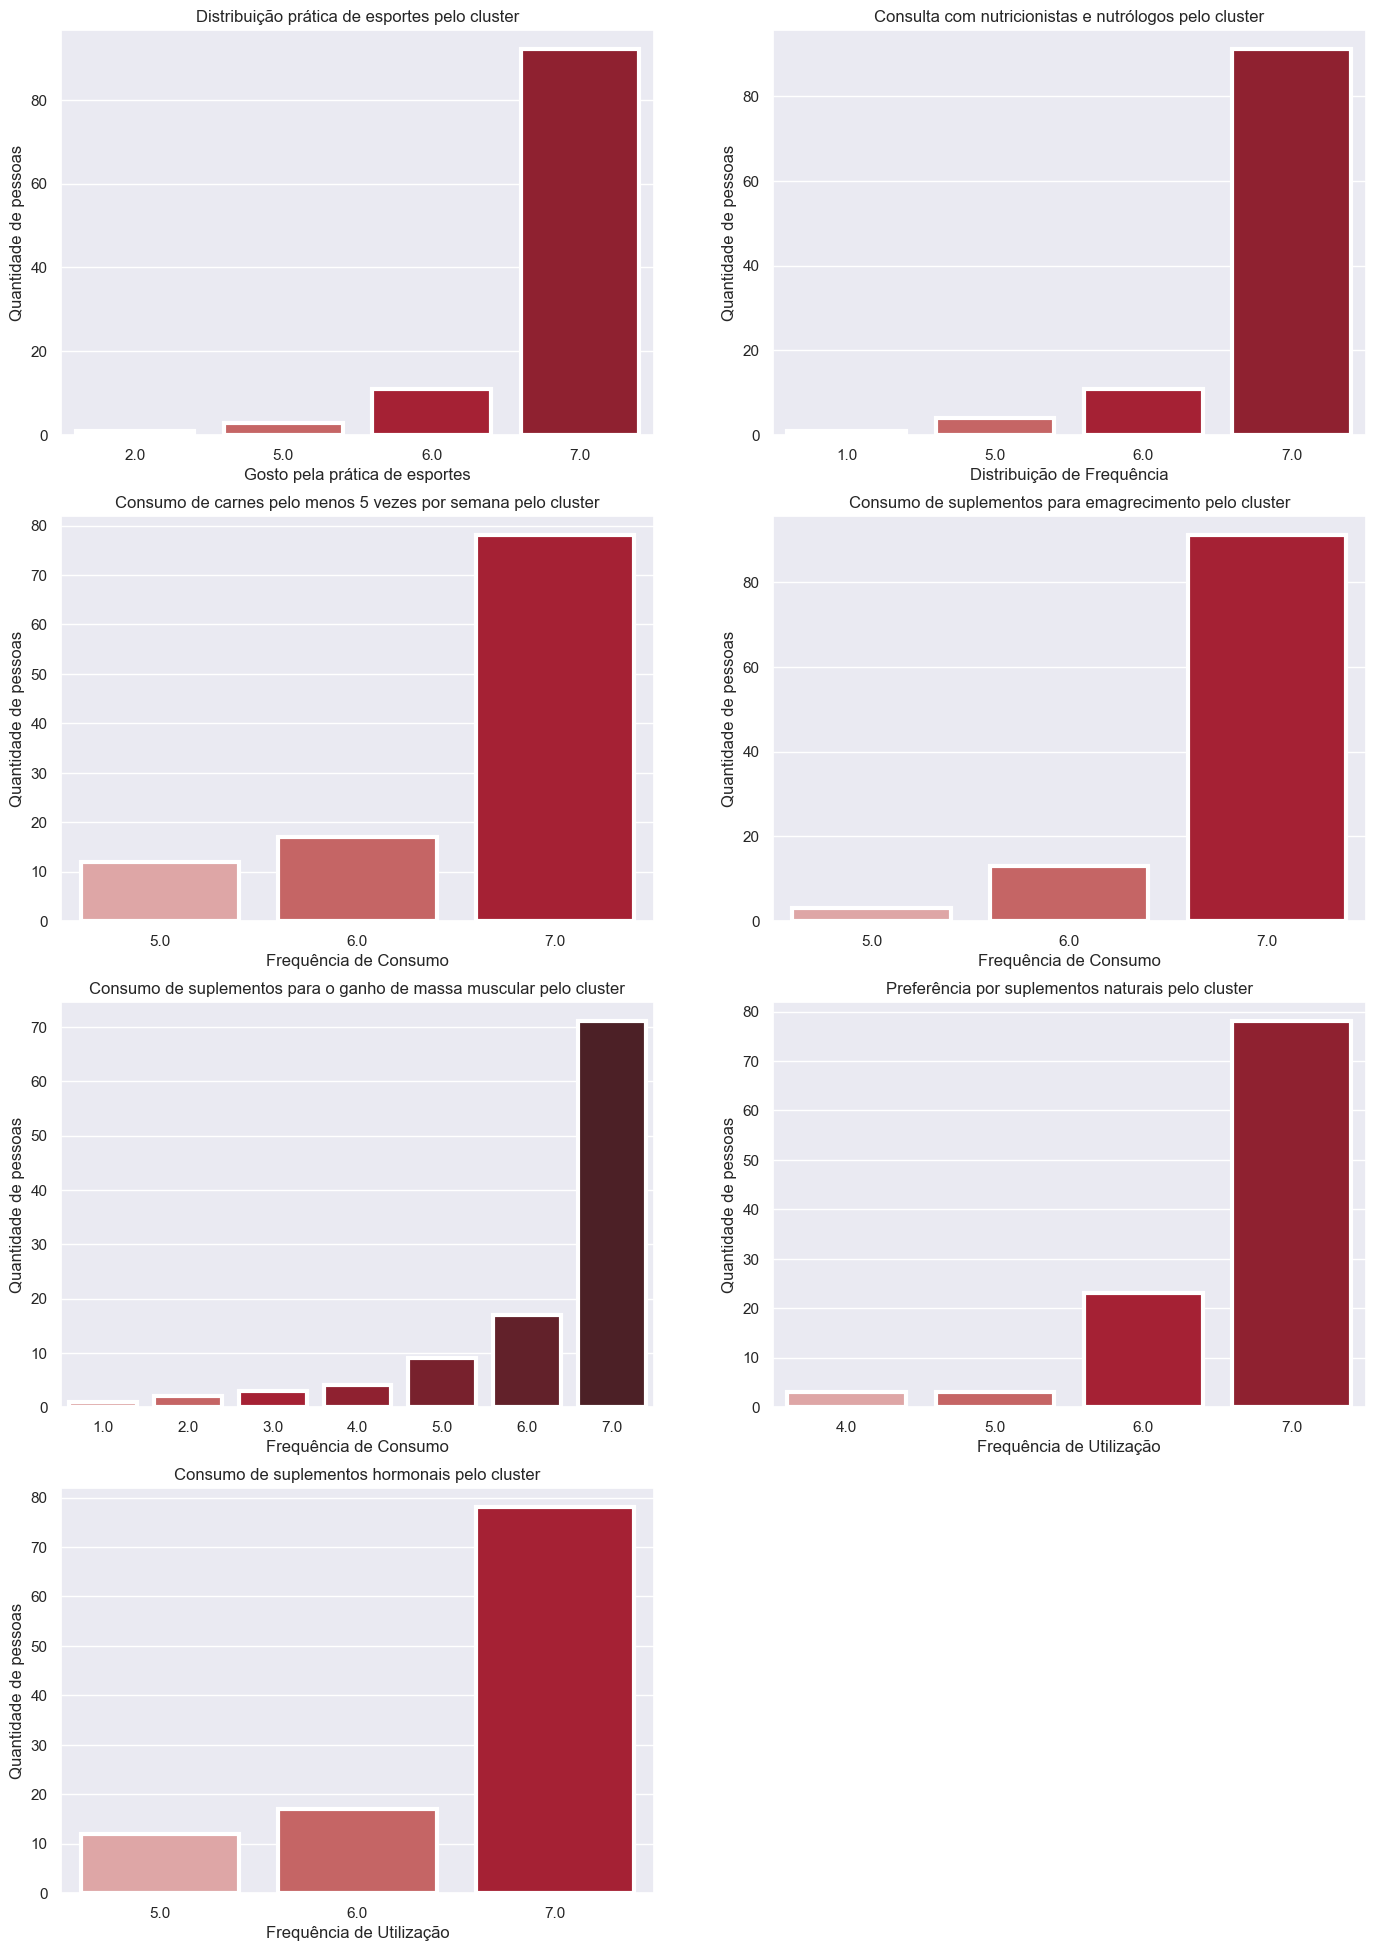

In [1192]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_analisef, x="P20", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição prática de esportes pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gosto pela prática de esportes')

plt.subplot(622)
sns.countplot(data= df_analisef, x="P21", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consulta com nutricionistas e nutrólogos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Distribuição de Frequência')

plt.subplot(623)
sns.countplot(data= df_analisef, x="P22", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de carnes pelo menos 5 vezes por semana pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(624)
sns.countplot(data= df_analisef, x="P23", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#A10F23","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos para emagrecimento pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(625)
sns.countplot(data= df_analisef, x="P24", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos para o ganho de massa muscular pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(626)
sns.countplot(data= df_analisef, x="P25", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Preferência por suplementos naturais pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

plt.subplot(627)
sns.countplot(data= df_analisef, x="P26", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos hormonais pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

Text(0.5, 0, 'Classe')

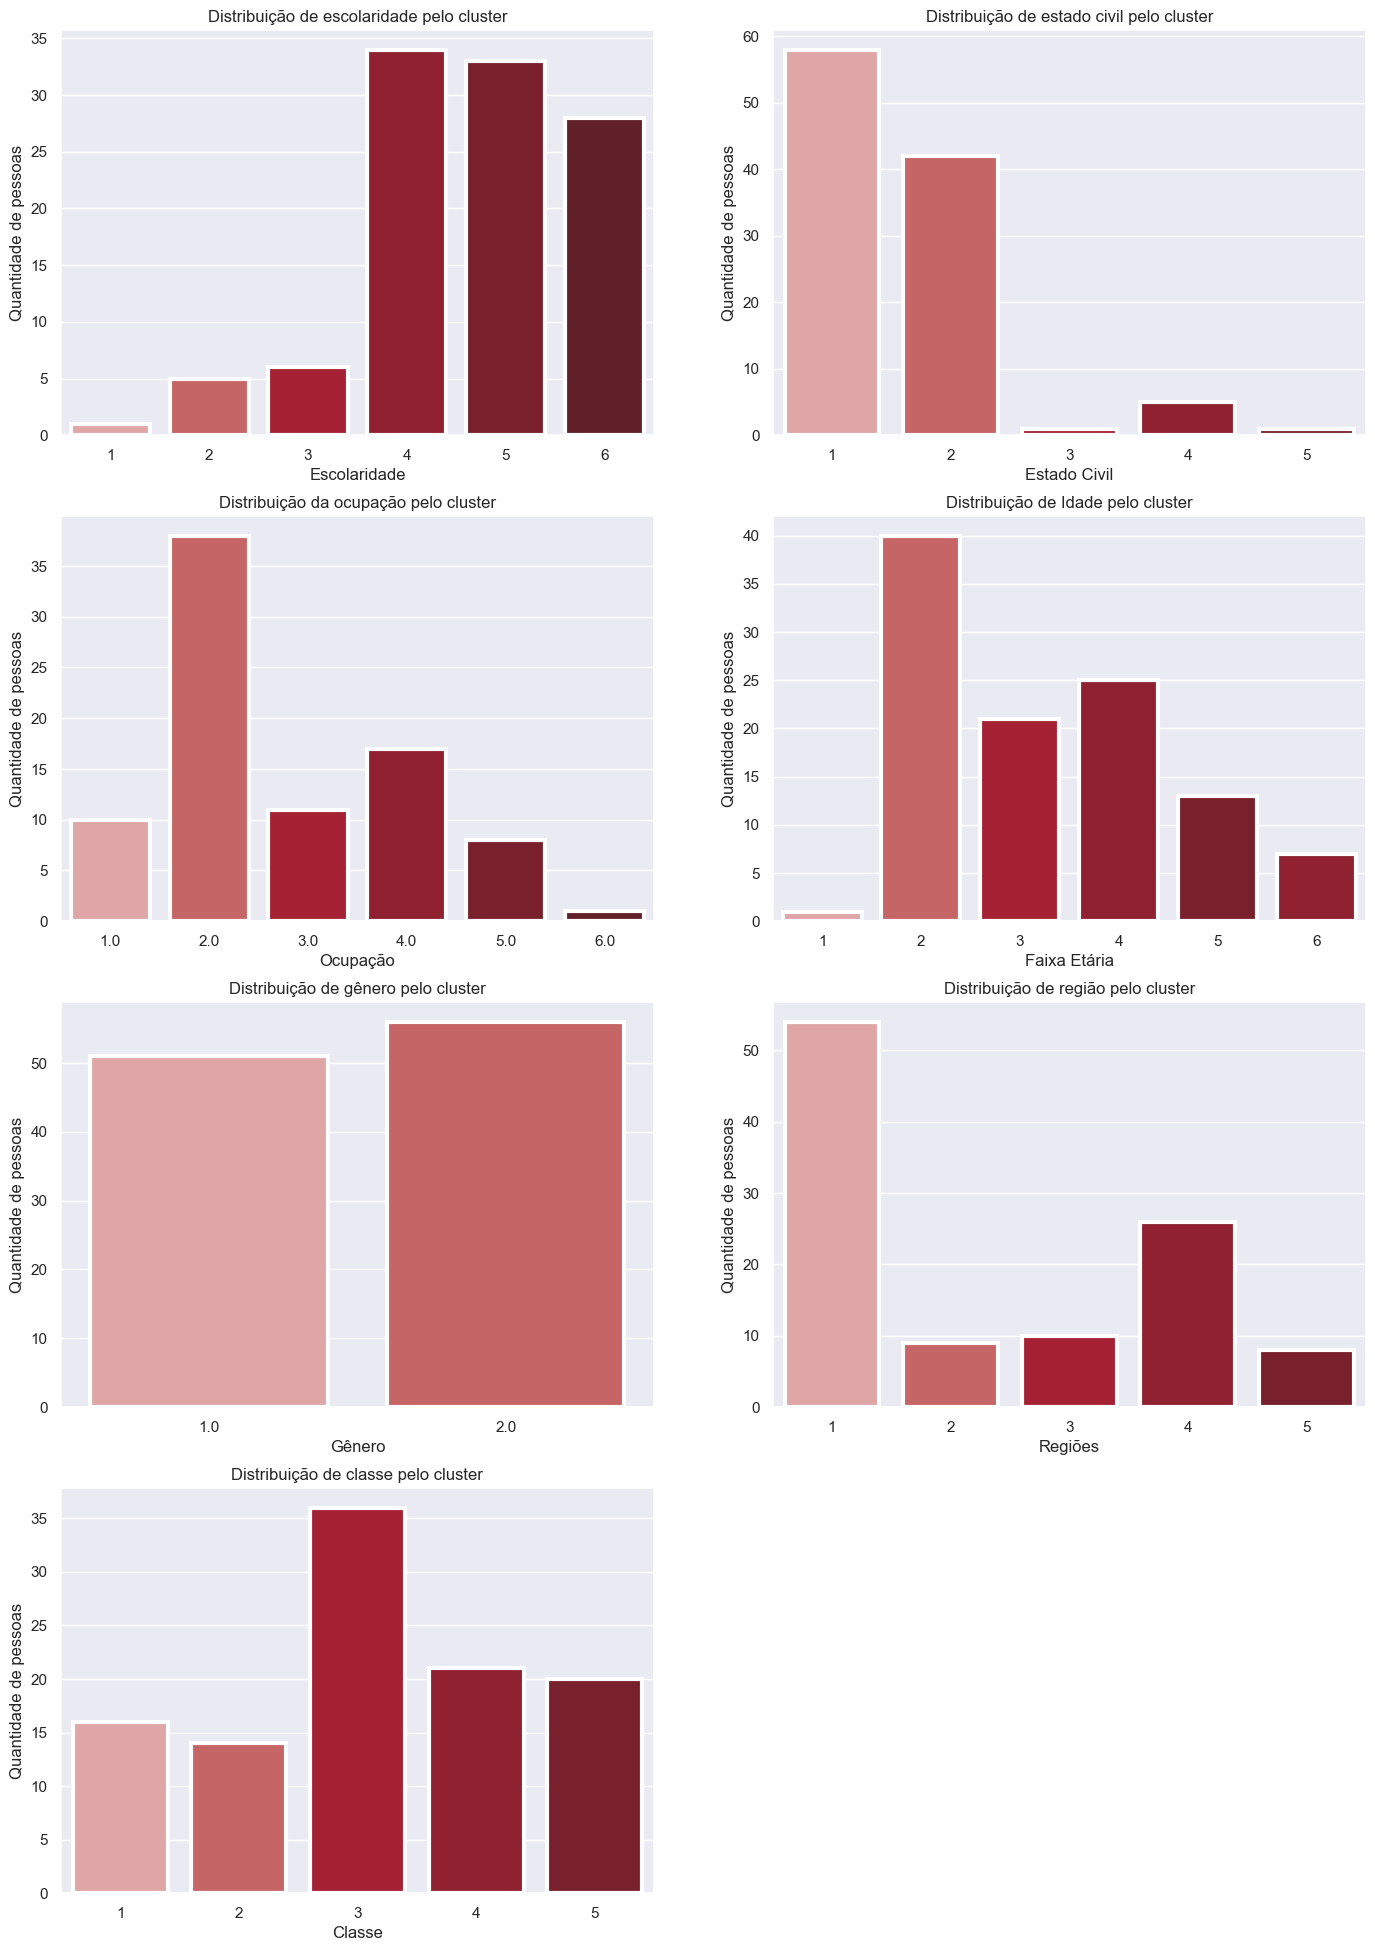

In [1194]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_analisef, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Escolaridade')

plt.subplot(622)
sns.countplot(data= df_analisef, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_analisef, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição da ocupação pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_analisef, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#A10F23","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Faixa Etária')

plt.subplot(625)
sns.countplot(data= df_analisef, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de gênero pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df_analisef, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de região pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Regiões')

plt.subplot(627)
sns.countplot(data= df_analisef, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de classe pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')